In [2]:
import glob
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import os
from torch.utils.data import Dataset, DataLoader
import torch
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt

In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cpu


In [4]:
import random
np.random.seed(0)
a = random.randint(0, 9)
b = random.randint(0, 9)
c = random.randint(0, 9)
sequence1 = np.linspace(a, a+3, 10000)
sequence2 = np.linspace(b, b+6, 10000)
sequence3 = np.linspace(c, c+9, 10000)

combined_sequence = np.column_stack((sequence1, sequence2, sequence3))

x = []
y = []
for i in range(0,10000,8):
    x.append(combined_sequence[i:i+120])
    y.append(combined_sequence[i+120:i+240])

x = np.array(x)
y = np.array(y)
print(x.shape, y.shape)
# plt.figure(figsize=(10,10))
# plt.plot(x,y)
# plt.show()



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1250,) + inhomogeneous part.

In [5]:
root_path = "/scratch/jz5952/FoV"
path = "/scratch/jz5952/FoV/dataset"
test_files = glob.glob(path + '/ChenYongting*.txt')
val_files = glob.glob(path + '/fupingyu*.txt') + glob.glob(path + '/GuoYushan*.txt')
train_files = glob.glob(path + '/*.txt')
other_files = glob.glob(path + '/intersection*.txt')+ glob.glob(path + '/original*.txt')+glob.glob(path + '/output*.txt')
train_files = list(filter(lambda i: i not in test_files and (i not in val_files and i not in other_files), train_files))

In [6]:
print(len(train_files))

76


In [7]:
def denoise(files, save_path, window_length=5, polyorder=3, deriv=0, delta=1.0, axis=0, mode='interp'):
    """Denoise the data using Savitzky-Golay filter.
    Args:
        data (np.ndarray): The data to denoise.
        window_length (int): The length of the filter window.
        polyorder (int): The order of the polynomial used to fit the samples.

    Returns:
        np.ndarray: The denoised data.
    """
    for f in files:
        print(f)
        df = pd.read_csv(f,sep=' ', header=None)
        df.columns = map(lambda x: x.replace(',',''), df.iloc[0])
        df = df.iloc[1:].astype(float)
        df = df.iloc[:,0:8]
        data = df.iloc[:,2:5].to_numpy()
        denoised_data = savgol_filter(data, window_length, polyorder, deriv=deriv, delta=delta, axis=axis, mode=mode)
        plt.figure()
        fig, ax = plt.subplots(1, 3, figsize=(12,4))
        rand_idx = 0
        if len(data) > 400:
            rand_idx = random.randint(0,len(data)-400)
        end_idx = min(rand_idx+400,len(data))
        ax[0].plot(data[rand_idx:end_idx,0],label="original")
        ax[1].plot(data[rand_idx:end_idx,1],label="original")
        ax[2].plot(data[rand_idx:end_idx,2],label="original")
        plt.legend()
        
        ax[0].plot(denoised_data[rand_idx:end_idx,0],label="denoised")
        ax[1].plot(denoised_data[rand_idx:end_idx,1],label="denoised")
        ax[2].plot(denoised_data[rand_idx:end_idx,2],label="denoised")
        plt.legend()
        plt.title("window length: "+str(window_length)+", polyorder: "+str(polyorder))
        plt.show()
        # np.savetxt(save_path, data, delimiter=' ', fmt='%f')    
    return

/scratch/jz5952/FoV/dataset/sulehan_sweep.txt


<Figure size 640x480 with 0 Axes>

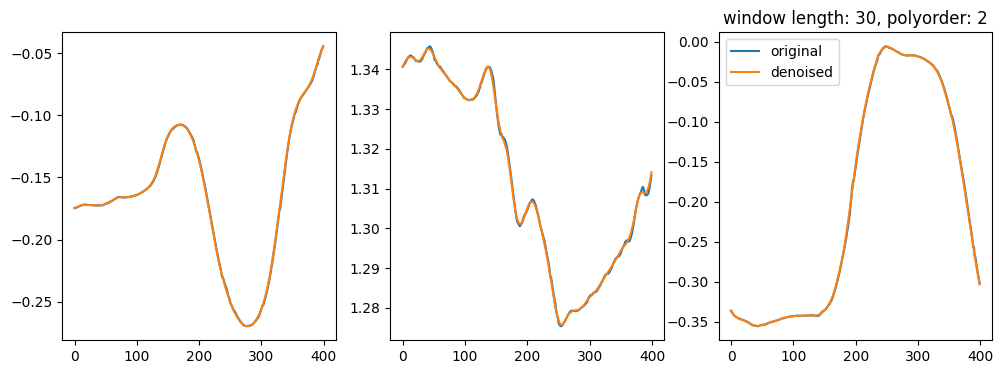

/scratch/jz5952/FoV/dataset/TuYuzhao_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

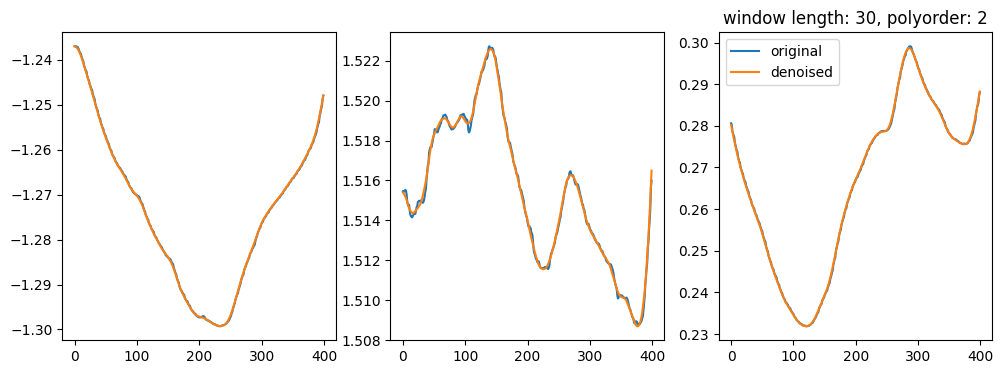

/scratch/jz5952/FoV/dataset/Guozhaonian_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

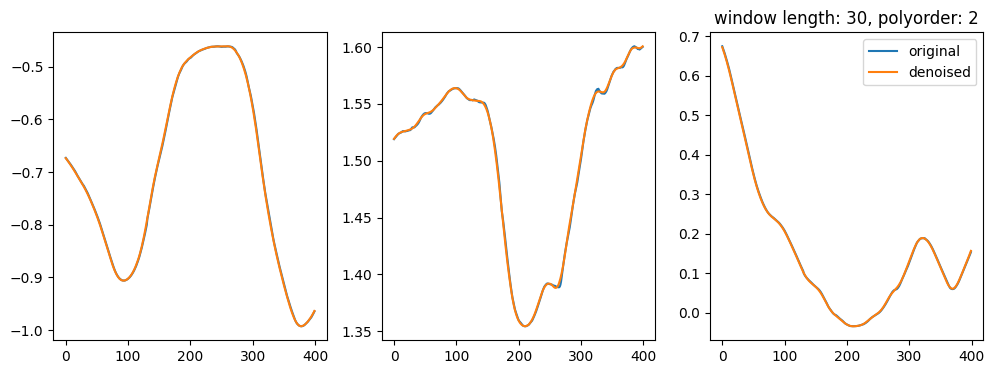

/scratch/jz5952/FoV/dataset/yuchen_chatting.txt


<Figure size 640x480 with 0 Axes>

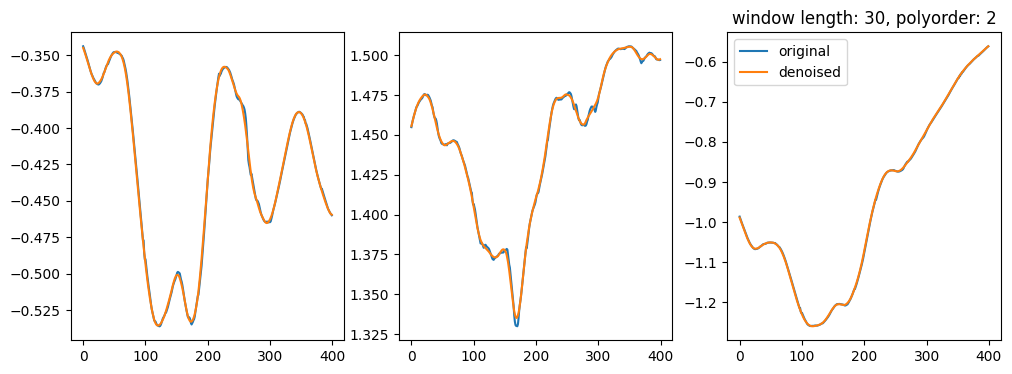

/scratch/jz5952/FoV/dataset/RenHongyu_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

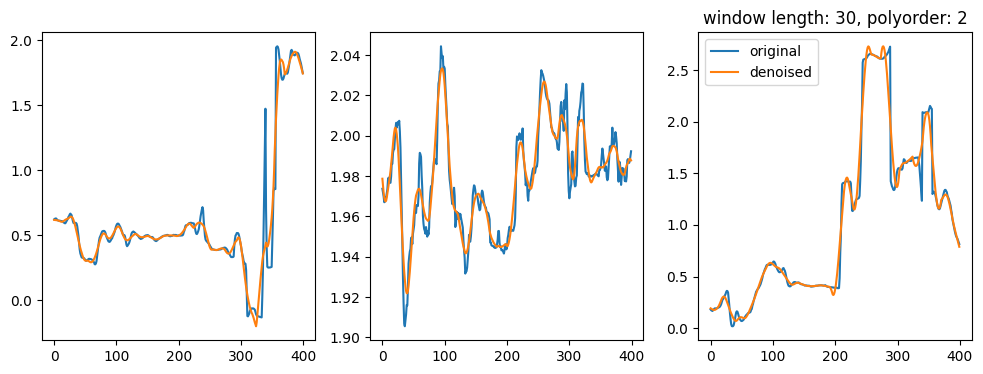

/scratch/jz5952/FoV/dataset/LHJ_sweep.txt


<Figure size 640x480 with 0 Axes>

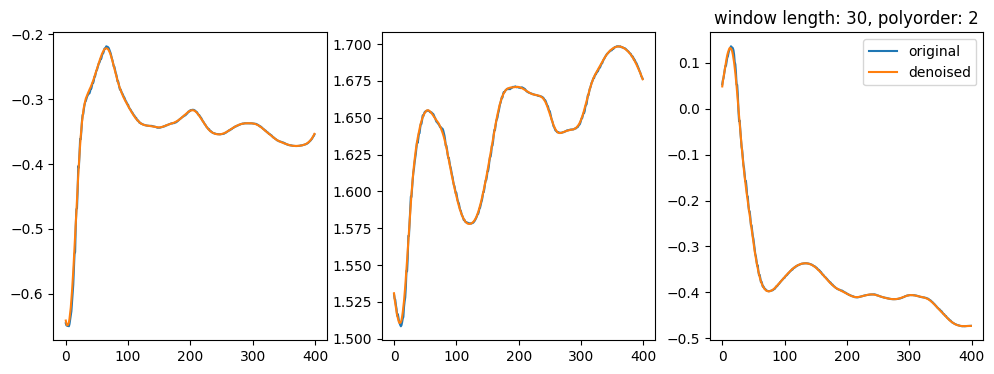

/scratch/jz5952/FoV/dataset/HKY_news_interviewing.txt


<Figure size 640x480 with 0 Axes>

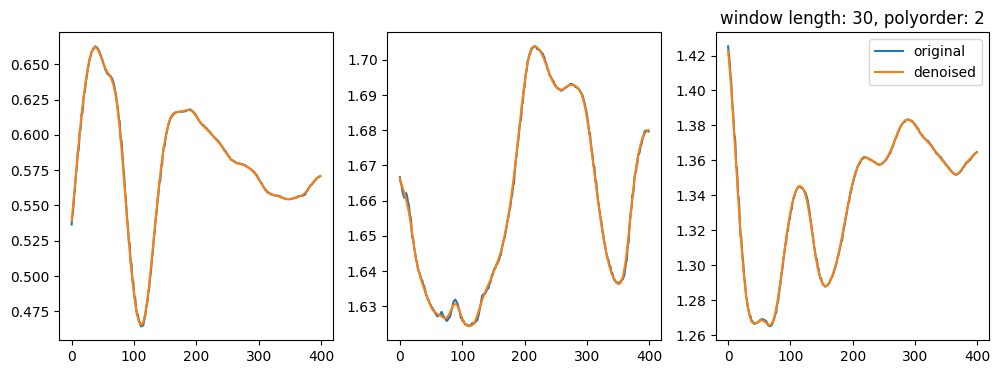

/scratch/jz5952/FoV/dataset/FengXuanqi_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

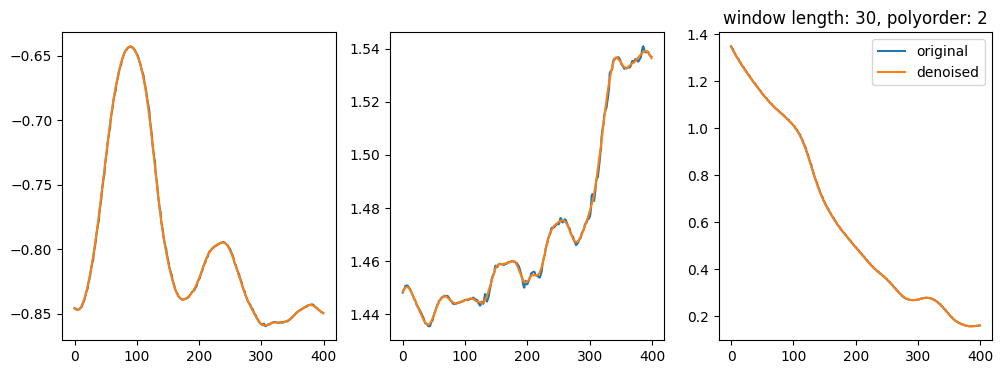

/scratch/jz5952/FoV/dataset/Guozhaonian_News_interviewing.txt


<Figure size 640x480 with 0 Axes>

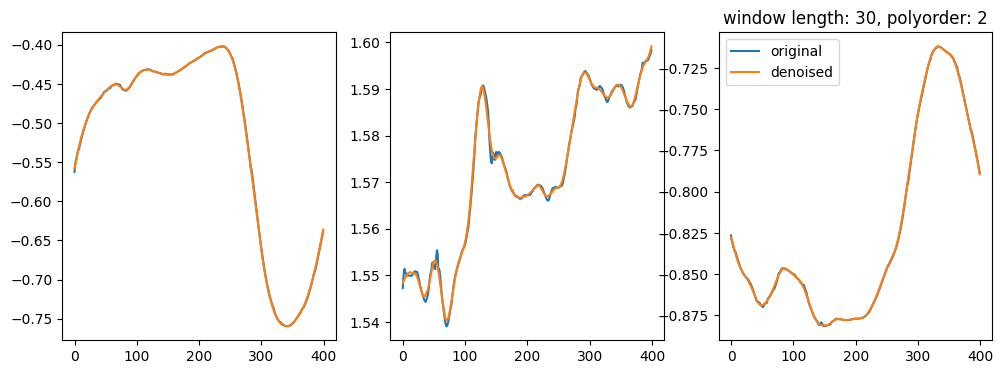

/scratch/jz5952/FoV/dataset/liuxuya_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

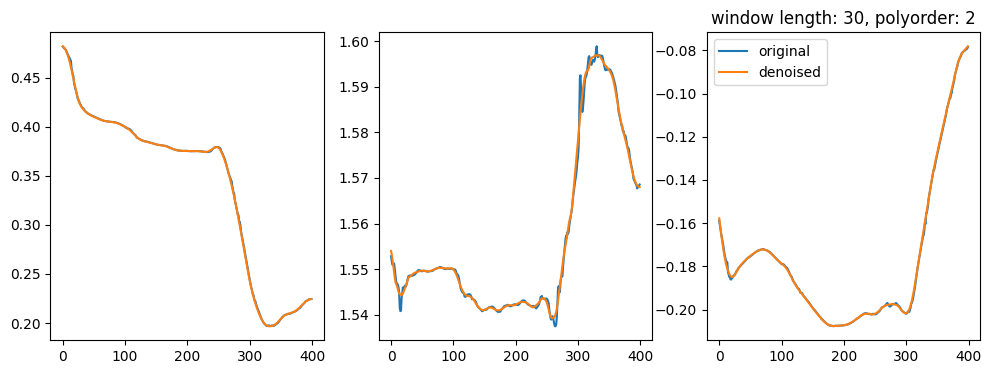

/scratch/jz5952/FoV/dataset/liuxuya_News_interviewing.txt


<Figure size 640x480 with 0 Axes>

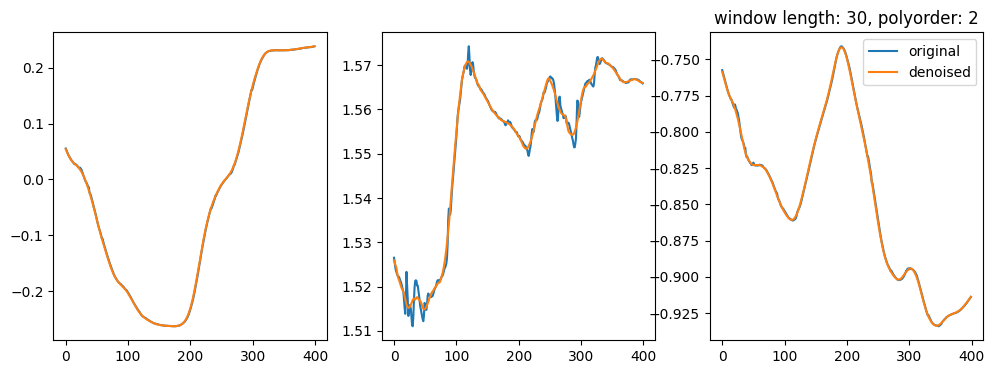

/scratch/jz5952/FoV/dataset/huangrenyi_chatting.txt


<Figure size 640x480 with 0 Axes>

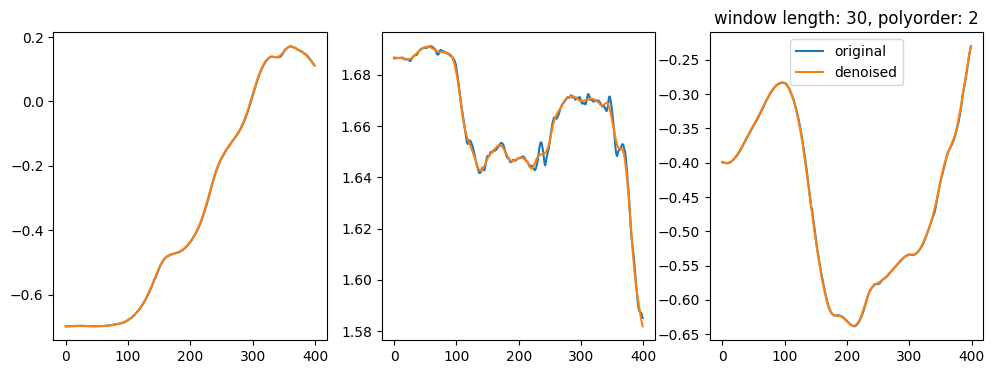

/scratch/jz5952/FoV/dataset/WangYan_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

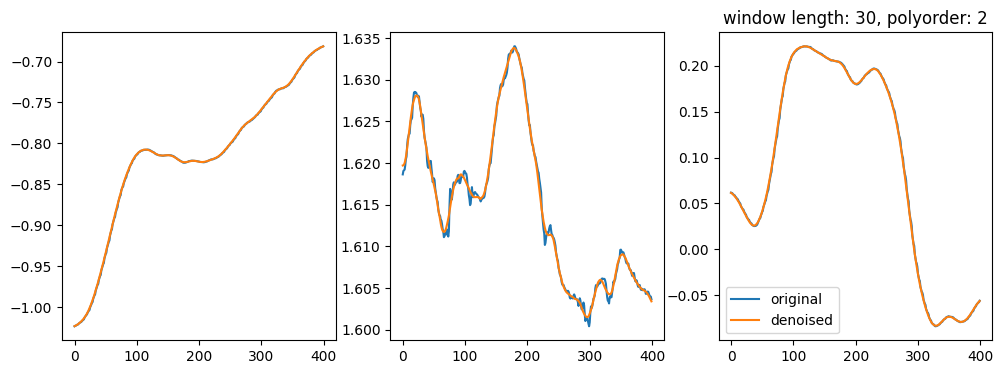

/scratch/jz5952/FoV/dataset/TuYuzhao_sweep.txt


<Figure size 640x480 with 0 Axes>

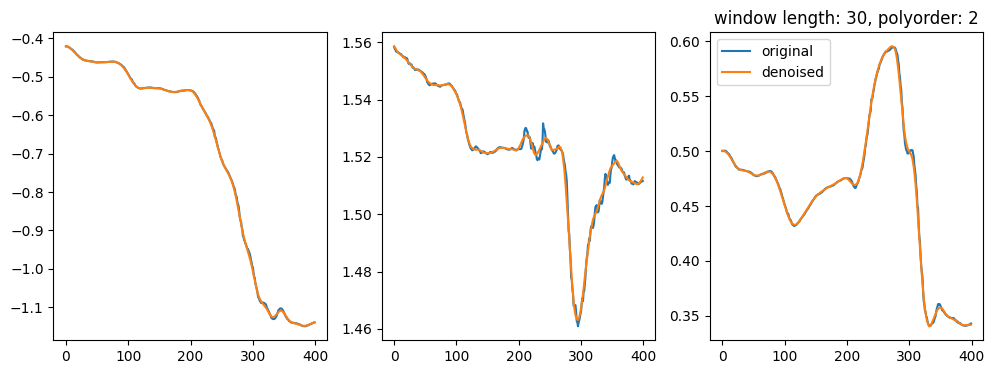

/scratch/jz5952/FoV/dataset/liuxuya_chatting.txt


<Figure size 640x480 with 0 Axes>

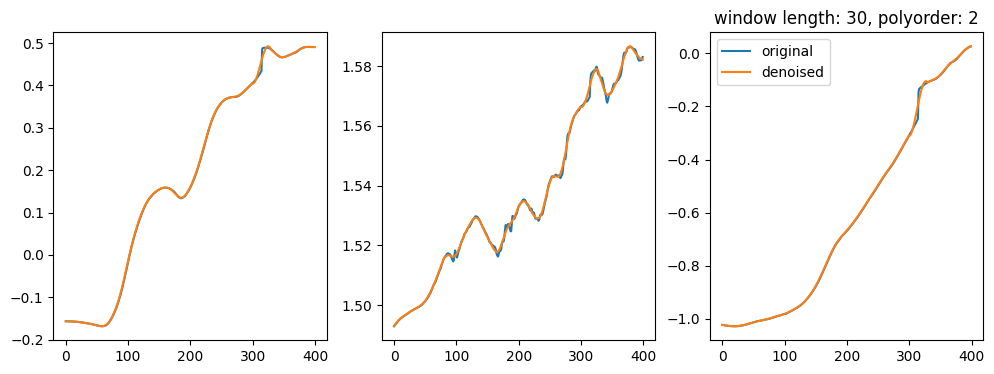

/scratch/jz5952/FoV/dataset/Sunqiran_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

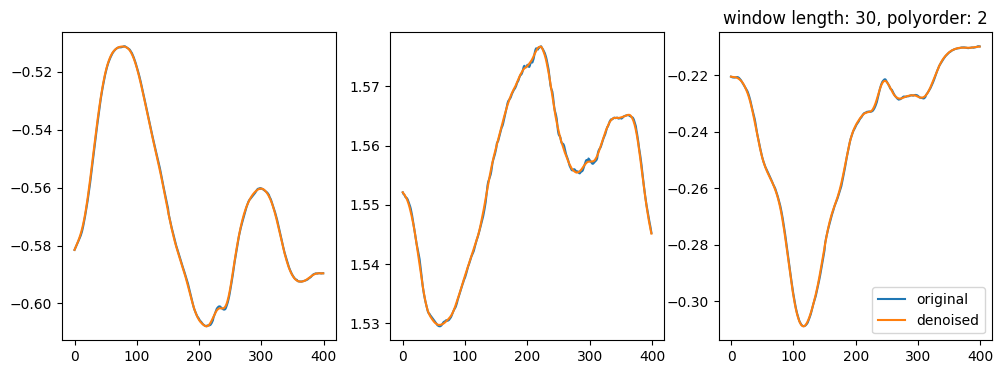

/scratch/jz5952/FoV/dataset/HKY_presenting.txt


<Figure size 640x480 with 0 Axes>

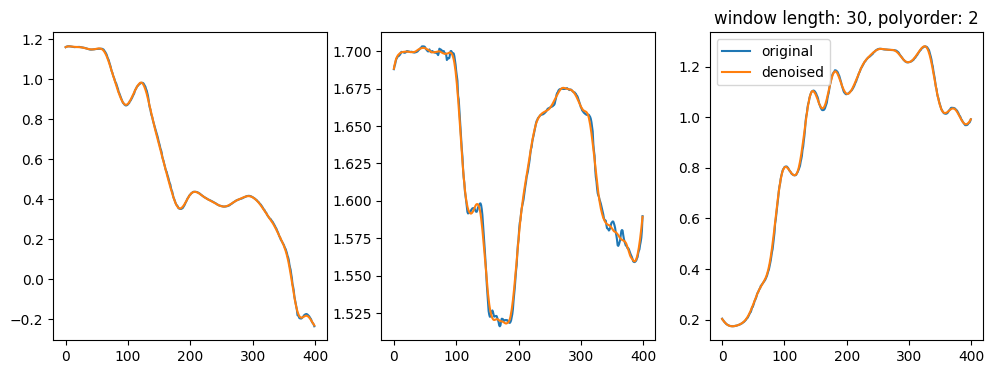

/scratch/jz5952/FoV/dataset/sulehan_presenting.txt


<Figure size 640x480 with 0 Axes>

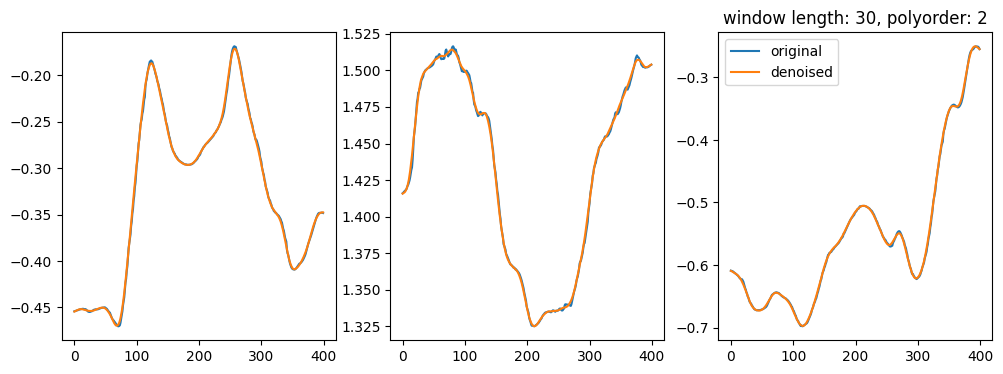

/scratch/jz5952/FoV/dataset/Sunqiran_sweep.txt


<Figure size 640x480 with 0 Axes>

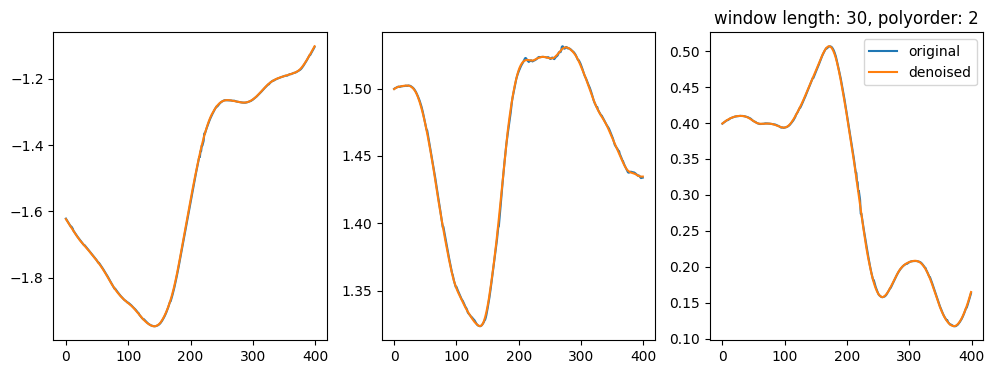

/scratch/jz5952/FoV/dataset/LHJ_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

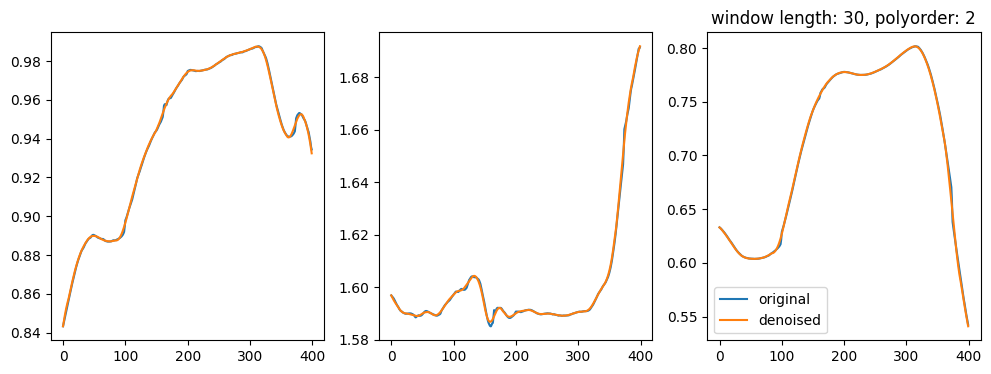

/scratch/jz5952/FoV/dataset/LiaoJunjian_cleaning_whiteborad.txt


<Figure size 640x480 with 0 Axes>

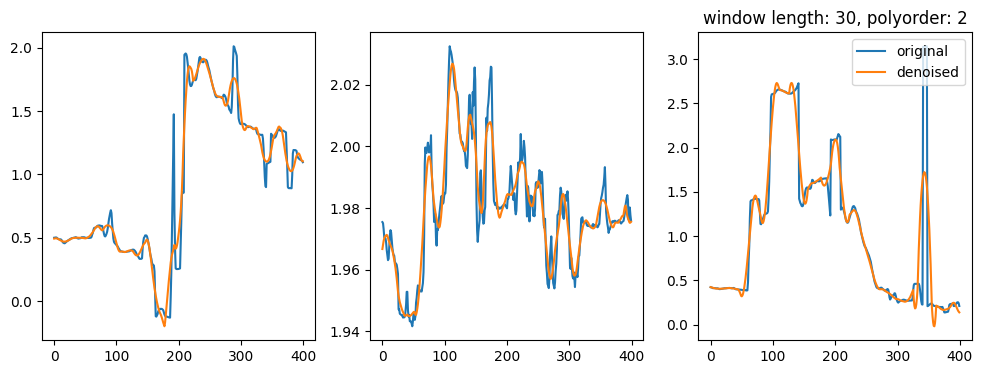

/scratch/jz5952/FoV/dataset/sulehan_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

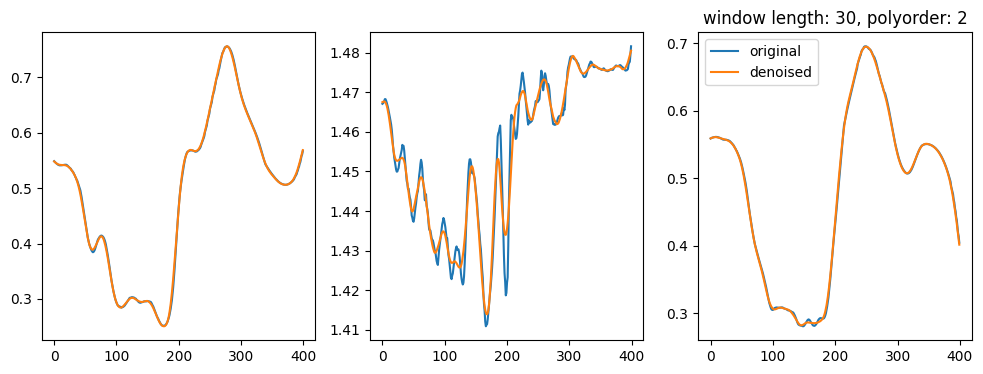

/scratch/jz5952/FoV/dataset/yuchen_sweep.txt


<Figure size 640x480 with 0 Axes>

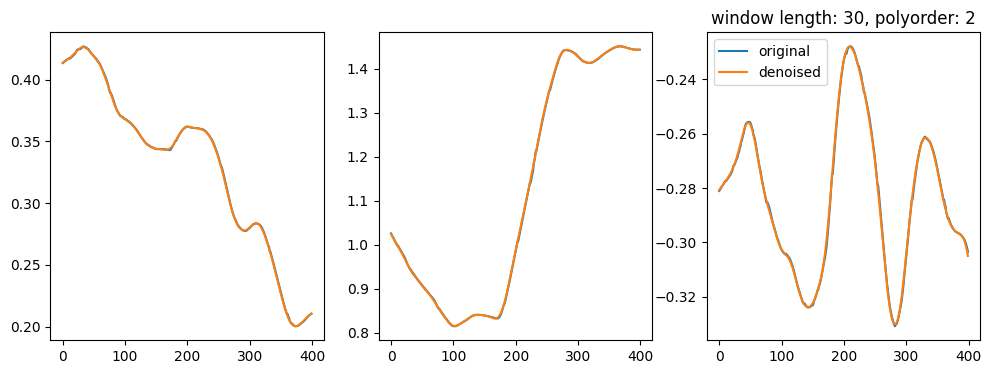

/scratch/jz5952/FoV/dataset/FengXuanqi_sweep.txt


<Figure size 640x480 with 0 Axes>

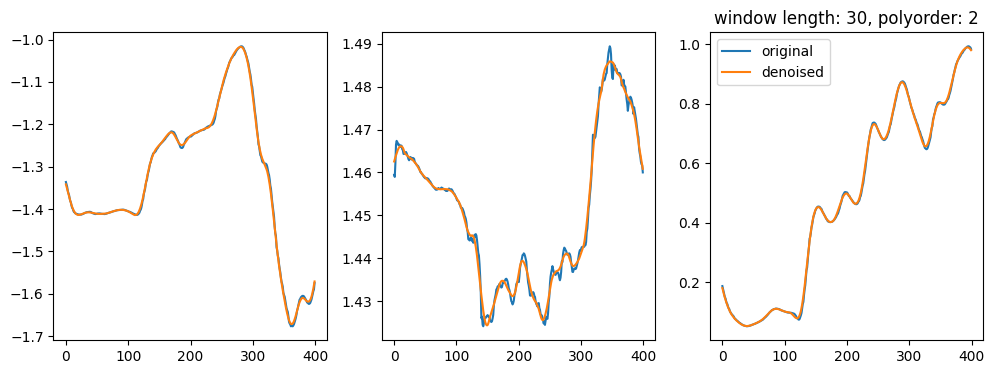

/scratch/jz5952/FoV/dataset/WangYan_sweep.txt


<Figure size 640x480 with 0 Axes>

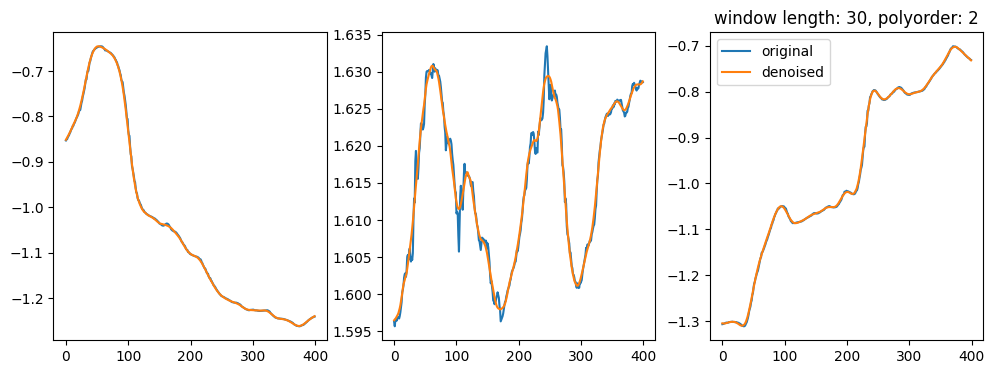

/scratch/jz5952/FoV/dataset/TuYuzhao_chatting.txt


<Figure size 640x480 with 0 Axes>

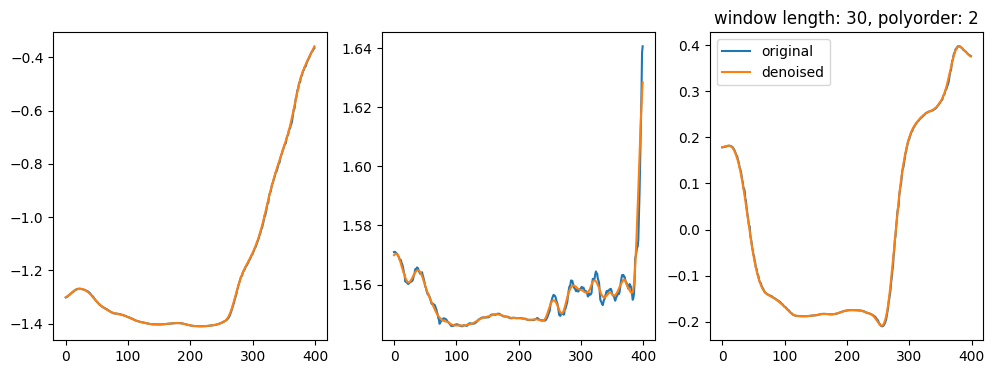

/scratch/jz5952/FoV/dataset/sulehan_chatting.txt


<Figure size 640x480 with 0 Axes>

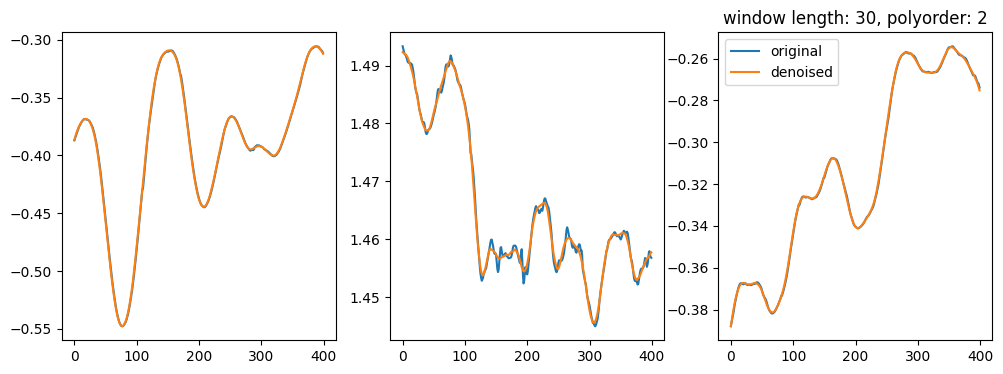

/scratch/jz5952/FoV/dataset/LHJ_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

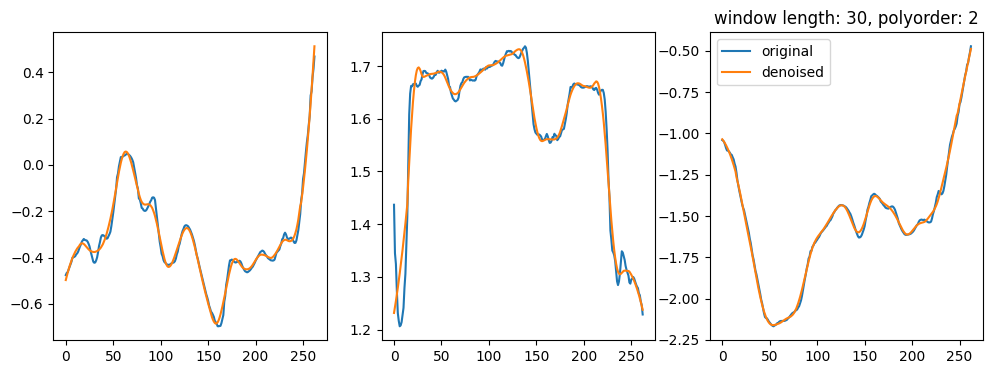

/scratch/jz5952/FoV/dataset/huangrenyi_sweep.txt


<Figure size 640x480 with 0 Axes>

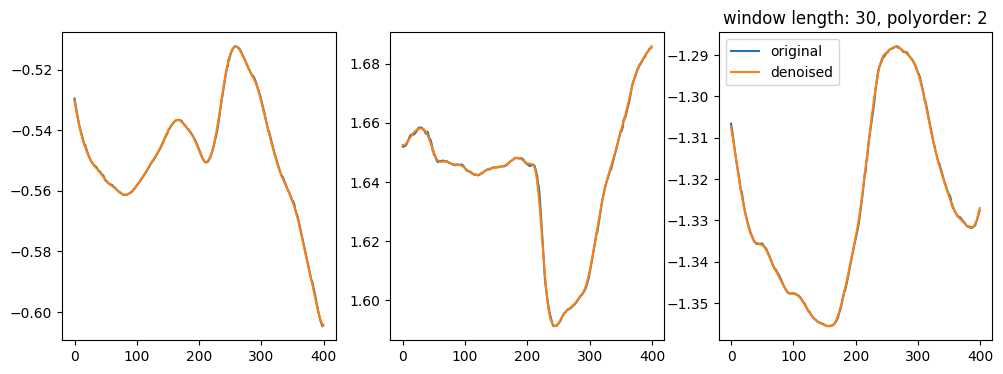

/scratch/jz5952/FoV/dataset/RenHongyu_news_interviewing.txt


<Figure size 640x480 with 0 Axes>

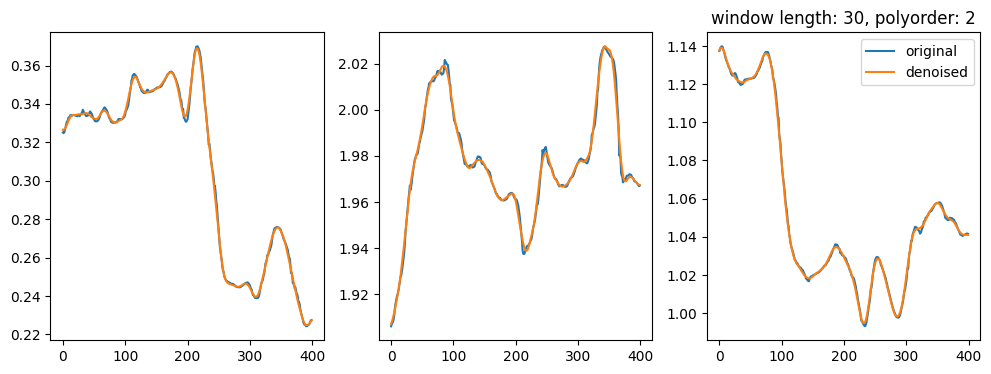

/scratch/jz5952/FoV/dataset/yuchen_presenting.txt


<Figure size 640x480 with 0 Axes>

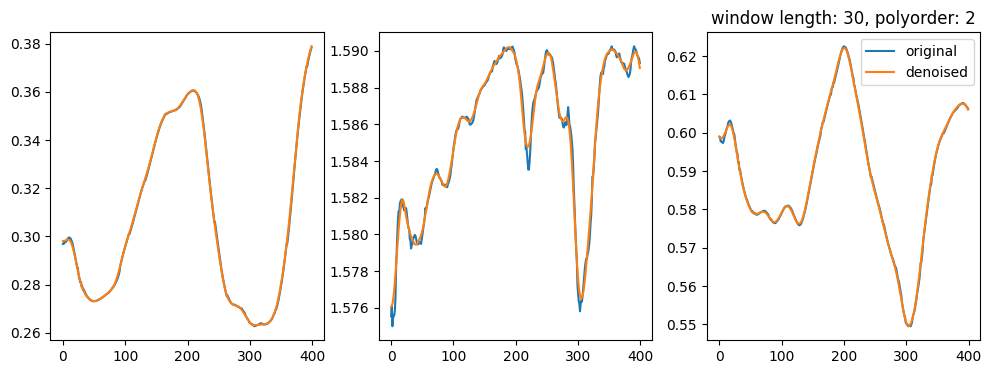

/scratch/jz5952/FoV/dataset/LHJ_chatting.txt


<Figure size 640x480 with 0 Axes>

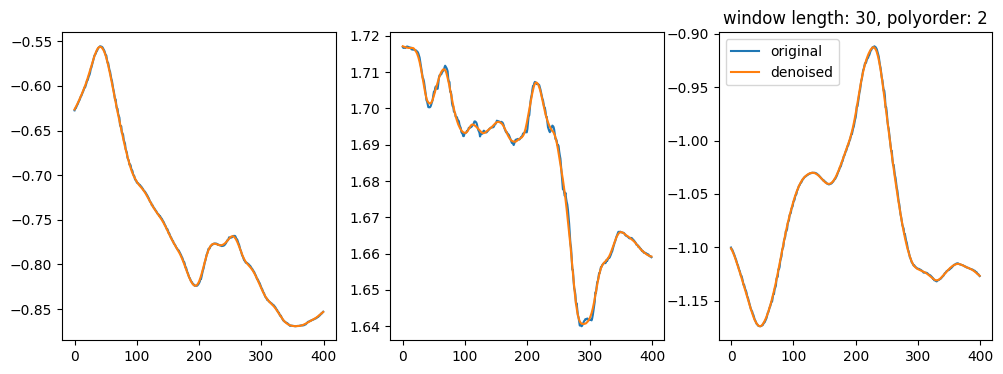

/scratch/jz5952/FoV/dataset/HKY_chatting.txt


<Figure size 640x480 with 0 Axes>

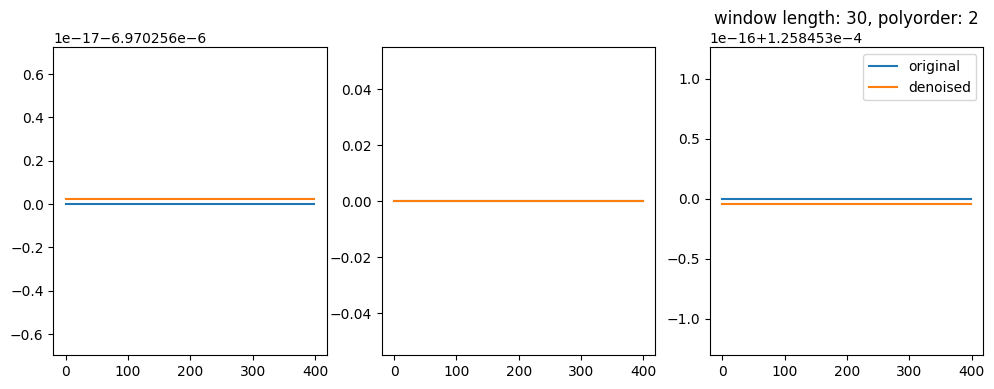

/scratch/jz5952/FoV/dataset/WangYan_chatting.txt


<Figure size 640x480 with 0 Axes>

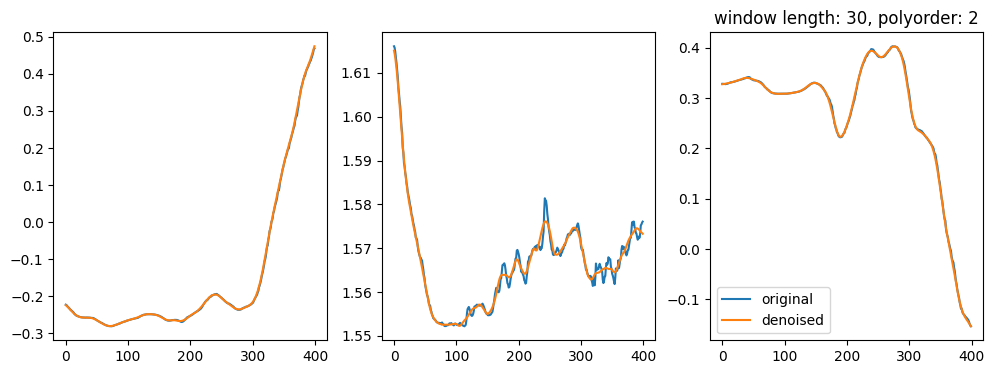

/scratch/jz5952/FoV/dataset/sulehan_News_interviewing.txt


<Figure size 640x480 with 0 Axes>

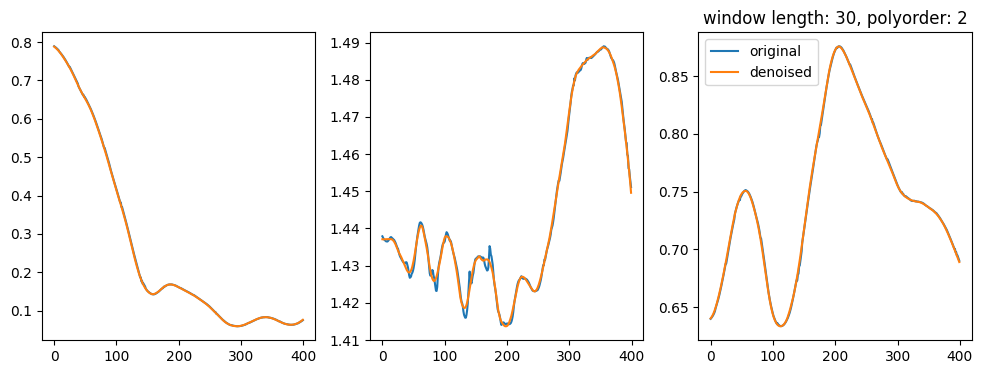

/scratch/jz5952/FoV/dataset/RenZhichen_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

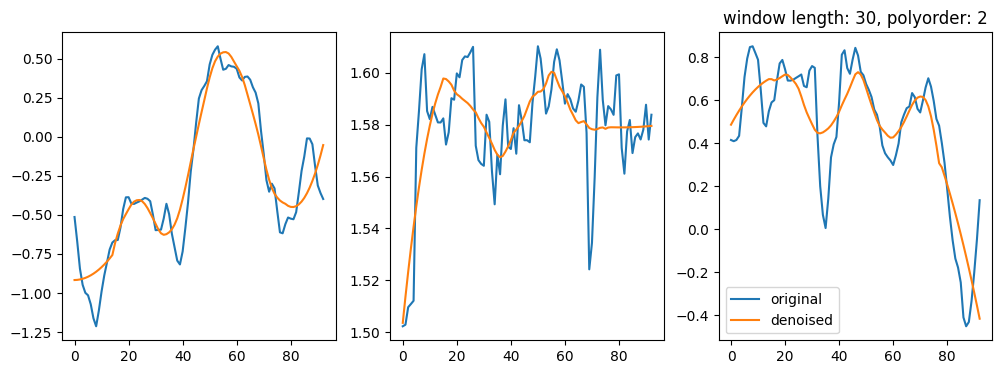

/scratch/jz5952/FoV/dataset/LiaoJunjian_playing_guitar.txt


<Figure size 640x480 with 0 Axes>

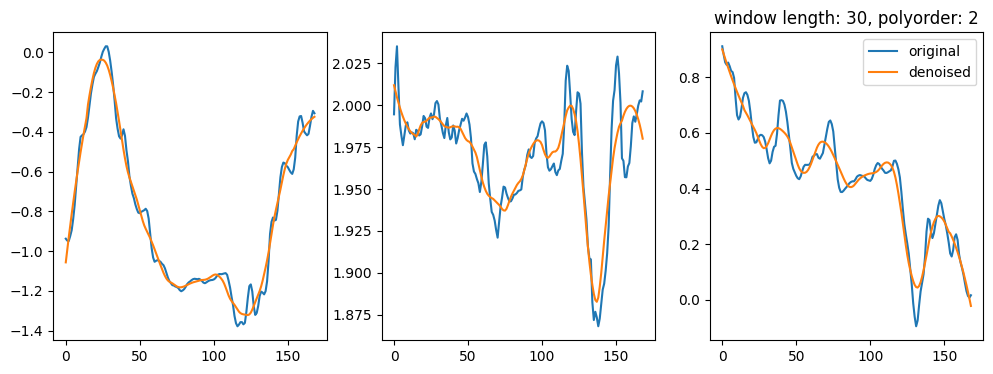

/scratch/jz5952/FoV/dataset/RenHongyu_playing_guitar.txt


<Figure size 640x480 with 0 Axes>

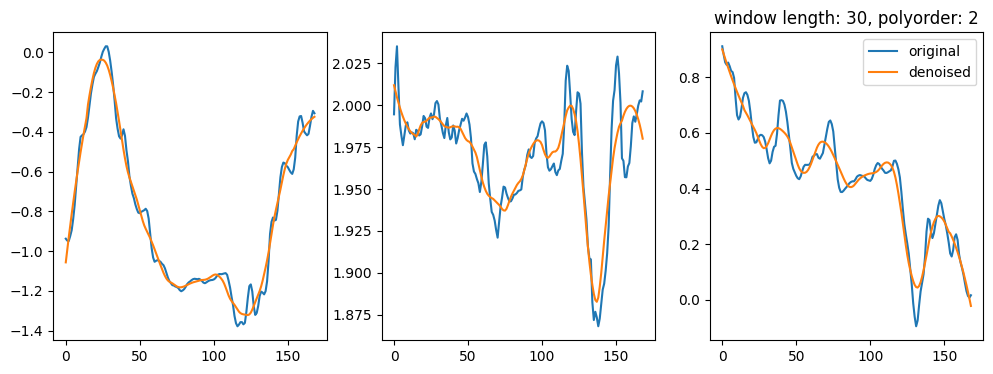

/scratch/jz5952/FoV/dataset/huangrenyi_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

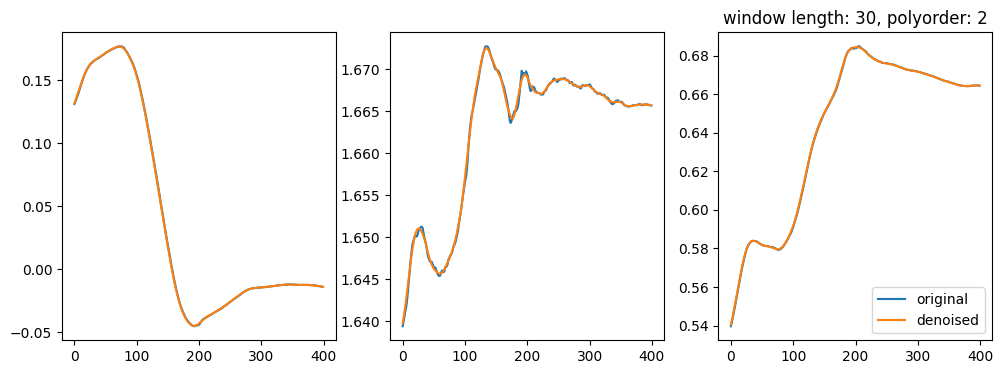

/scratch/jz5952/FoV/dataset/Guozhaonian_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

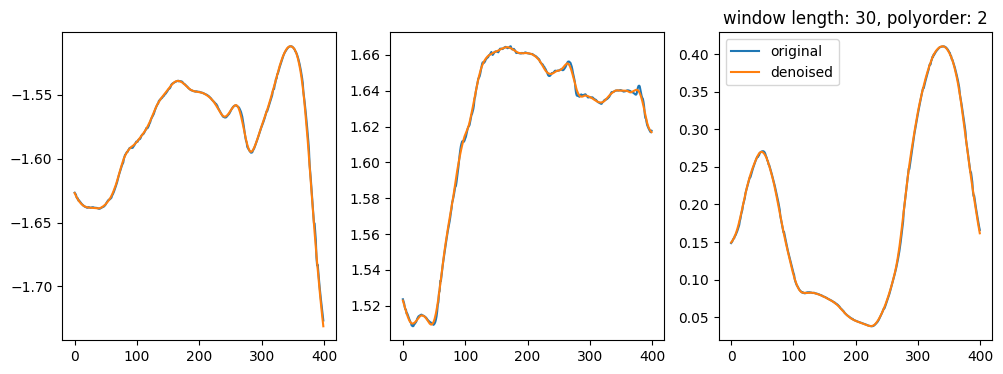

/scratch/jz5952/FoV/dataset/Sunqiran_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

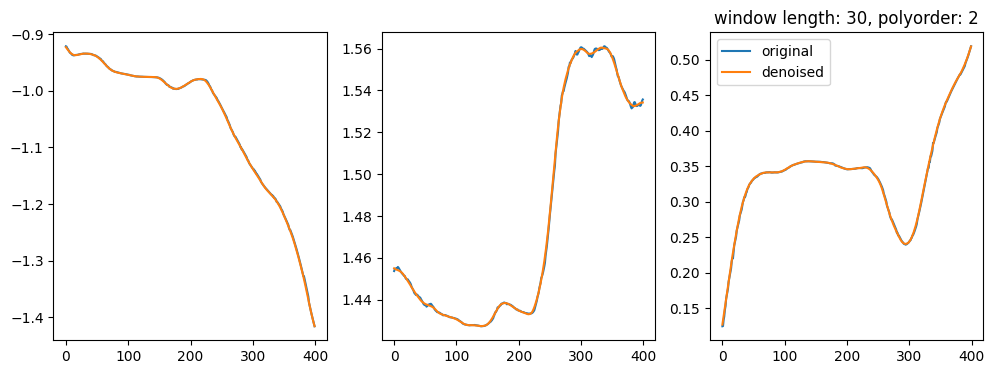

/scratch/jz5952/FoV/dataset/sulehan_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

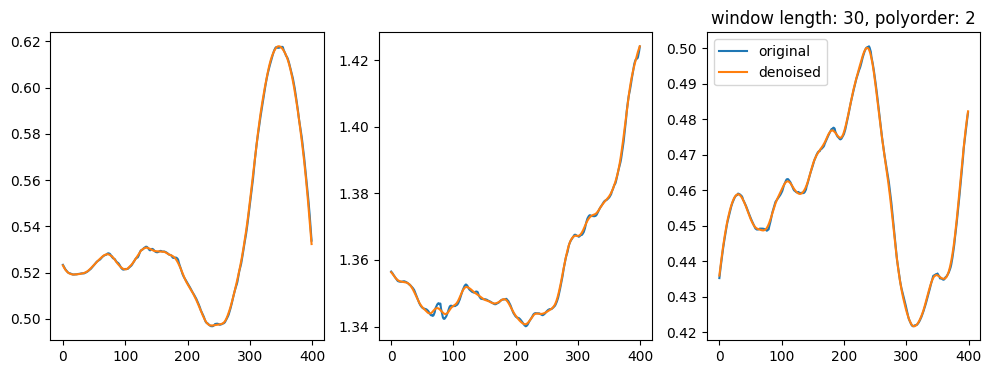

/scratch/jz5952/FoV/dataset/Guozhaonian_chatting.txt


<Figure size 640x480 with 0 Axes>

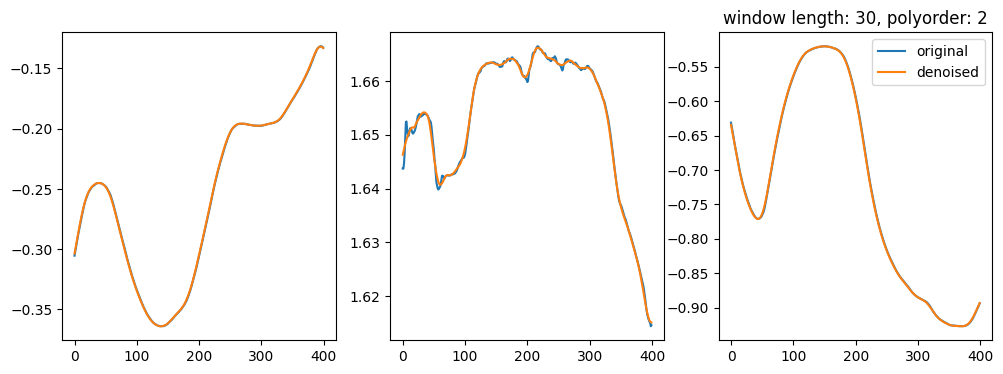

/scratch/jz5952/FoV/dataset/RenZhichen_News_interviewing.txt


<Figure size 640x480 with 0 Axes>

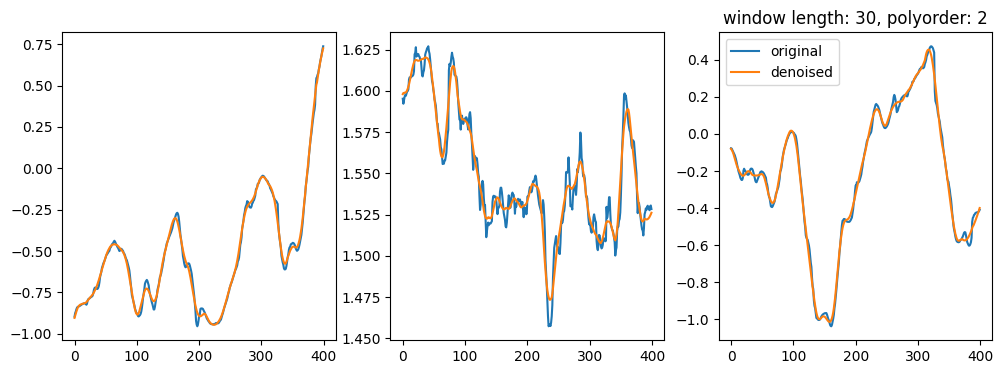

/scratch/jz5952/FoV/dataset/LiaoJunjian_chatting.txt


<Figure size 640x480 with 0 Axes>

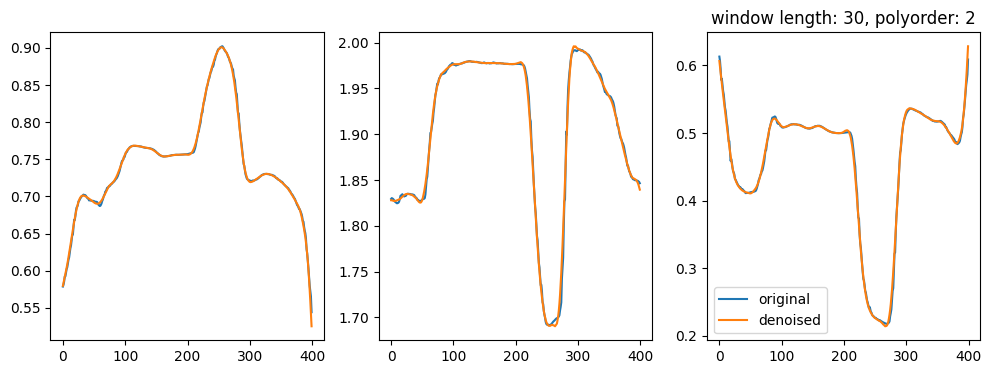

/scratch/jz5952/FoV/dataset/liuxuya_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

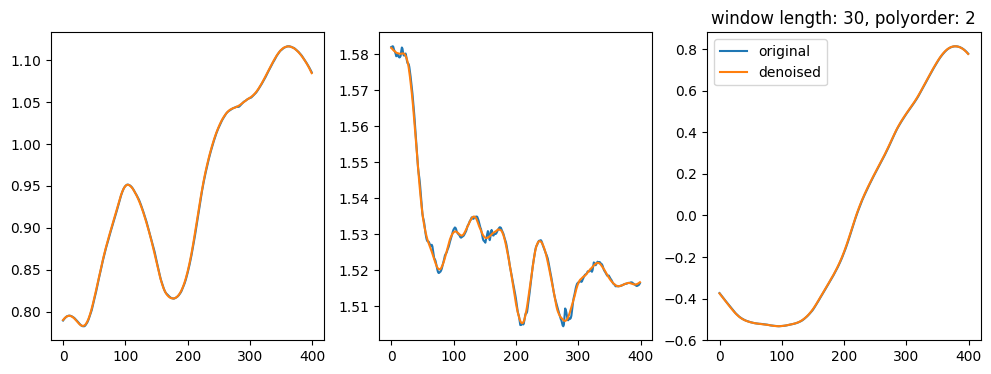

/scratch/jz5952/FoV/dataset/RenZhichen_chatting.txt


<Figure size 640x480 with 0 Axes>

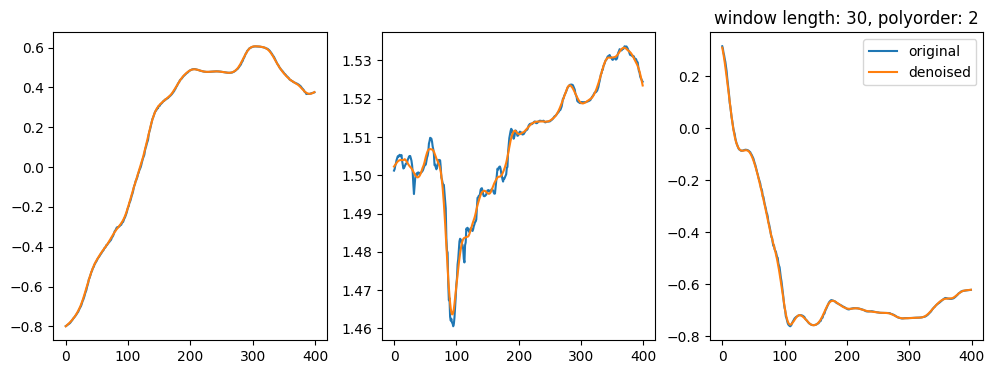

/scratch/jz5952/FoV/dataset/yuchen_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

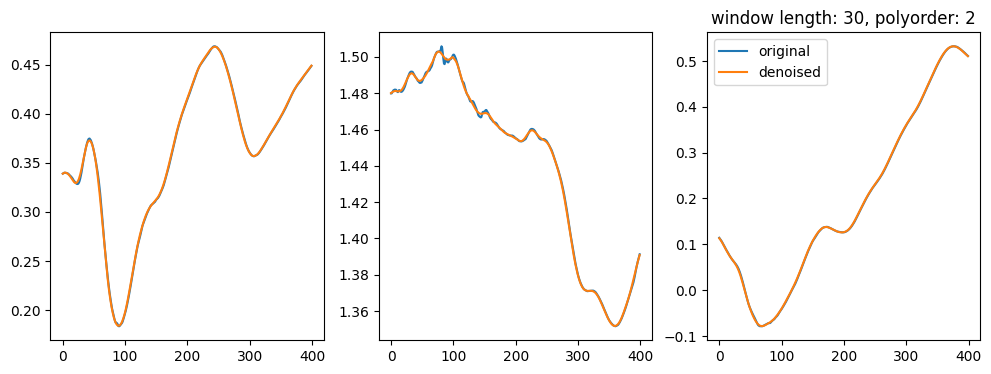

/scratch/jz5952/FoV/dataset/yuchen_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

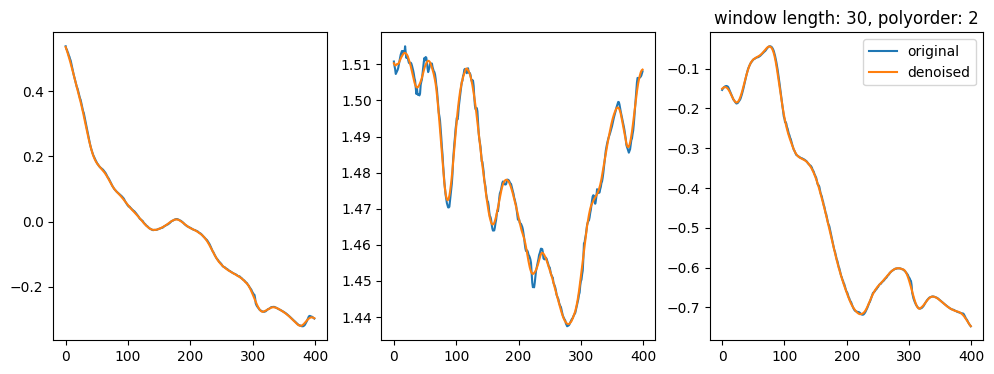

/scratch/jz5952/FoV/dataset/WangYan_presenting.txt


<Figure size 640x480 with 0 Axes>

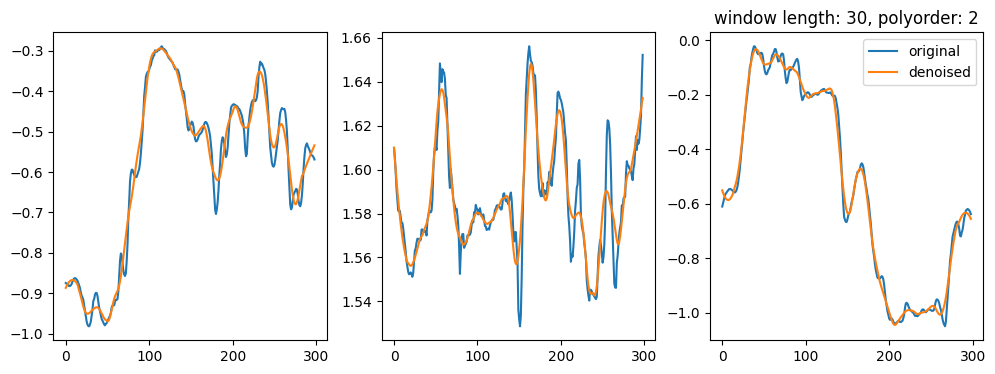

/scratch/jz5952/FoV/dataset/LiaoJunjian_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

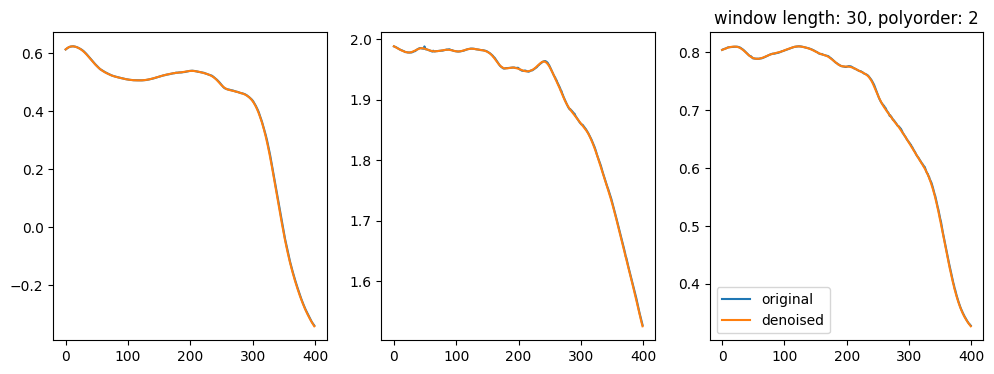

/scratch/jz5952/FoV/dataset/Sunqiran_presenting.txt


<Figure size 640x480 with 0 Axes>

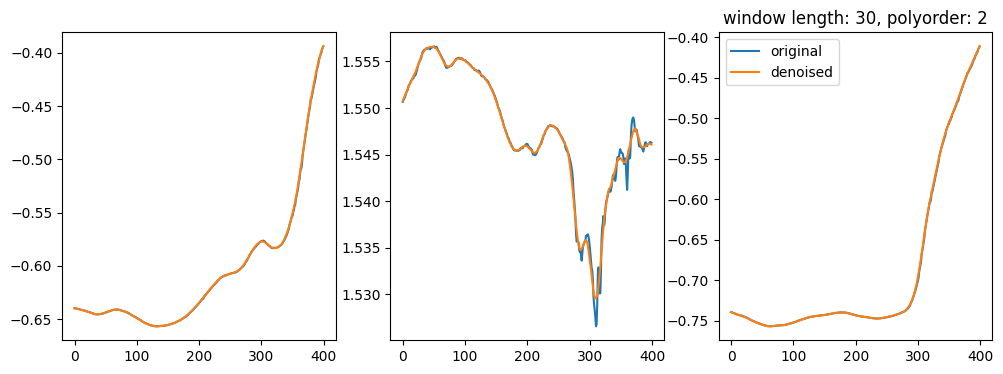

/scratch/jz5952/FoV/dataset/LiaoJunjian_sweep.txt


<Figure size 640x480 with 0 Axes>

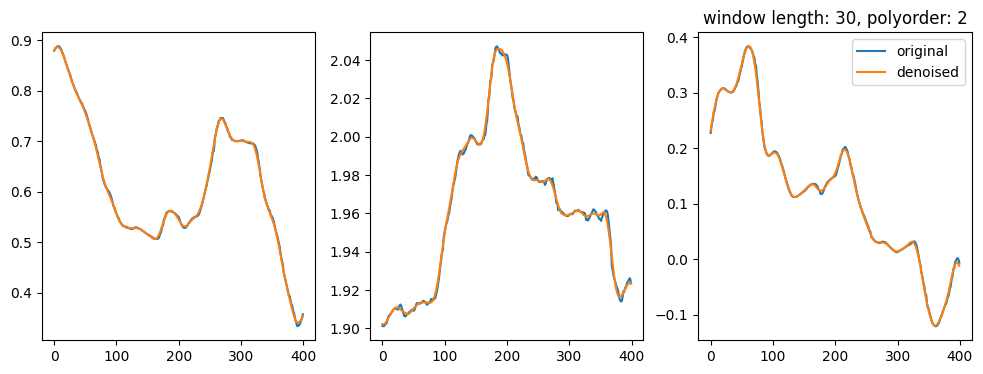

/scratch/jz5952/FoV/dataset/huangrenyi_News_interviewing.txt


<Figure size 640x480 with 0 Axes>

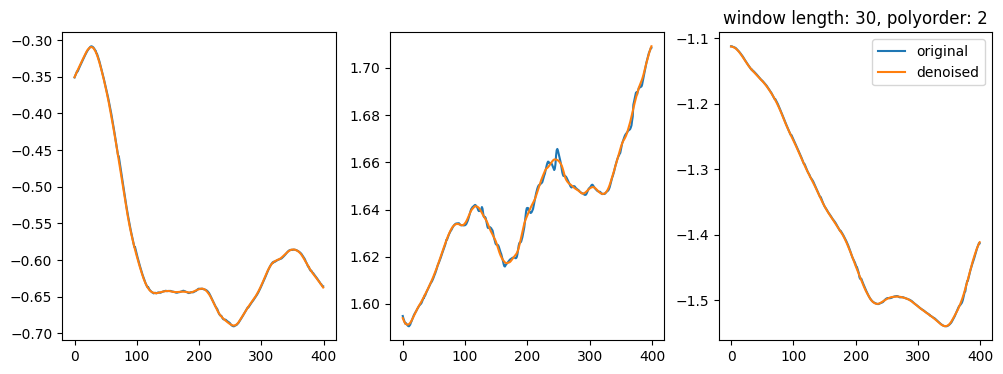

/scratch/jz5952/FoV/dataset/liuxuya_sweep.txt


<Figure size 640x480 with 0 Axes>

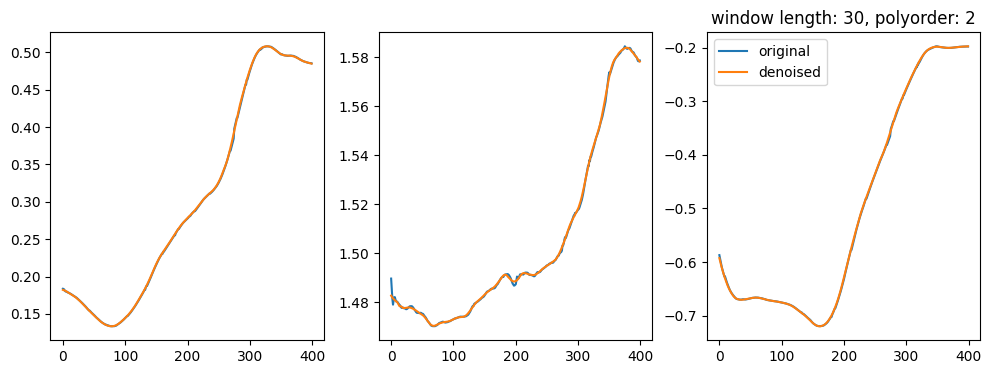

/scratch/jz5952/FoV/dataset/RenHongyu_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

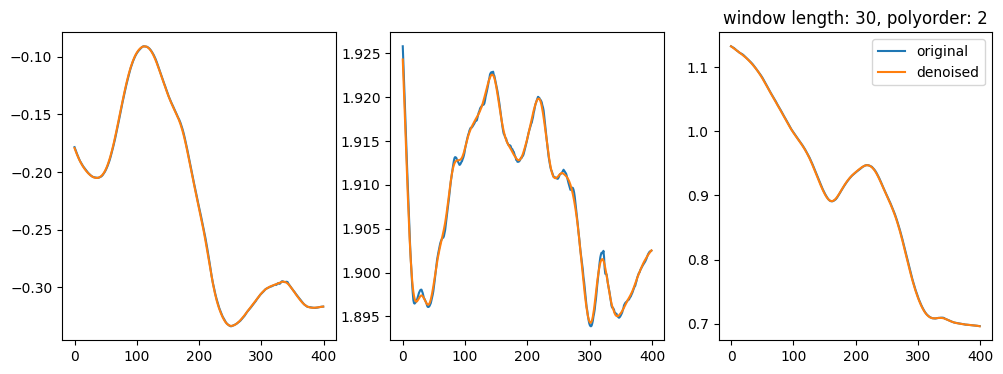

/scratch/jz5952/FoV/dataset/huangrenyi_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

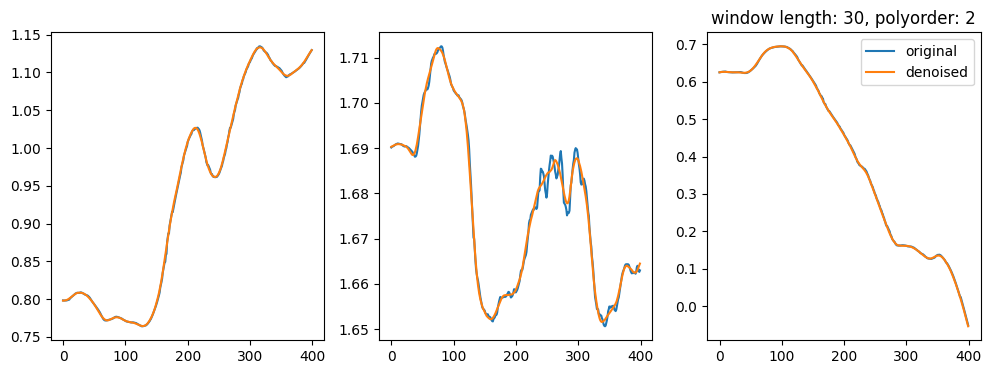

/scratch/jz5952/FoV/dataset/RenZhichen_presenting.txt


<Figure size 640x480 with 0 Axes>

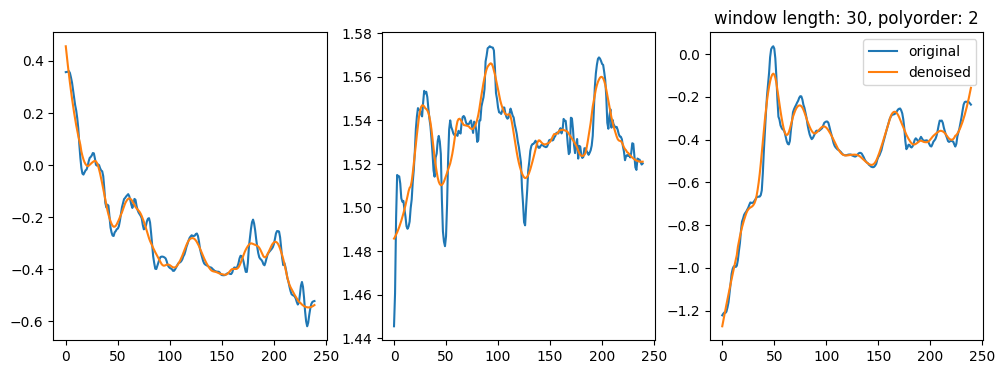

/scratch/jz5952/FoV/dataset/liuxuya_presenting.txt


<Figure size 640x480 with 0 Axes>

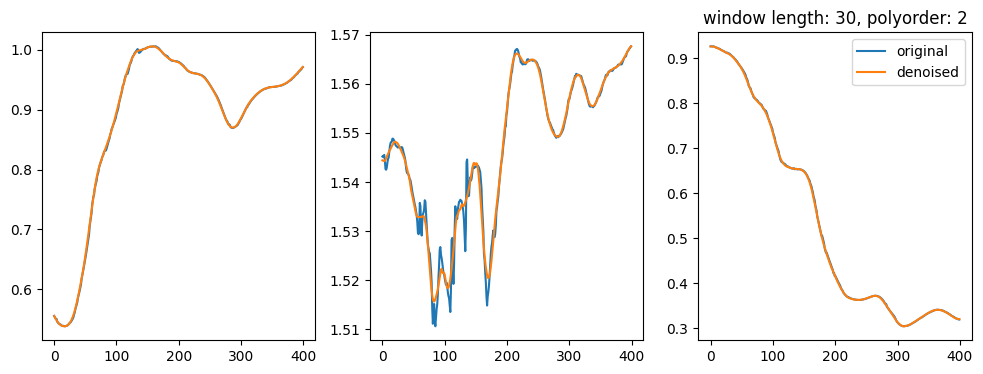

/scratch/jz5952/FoV/dataset/huangrenyi_presenting.txt


<Figure size 640x480 with 0 Axes>

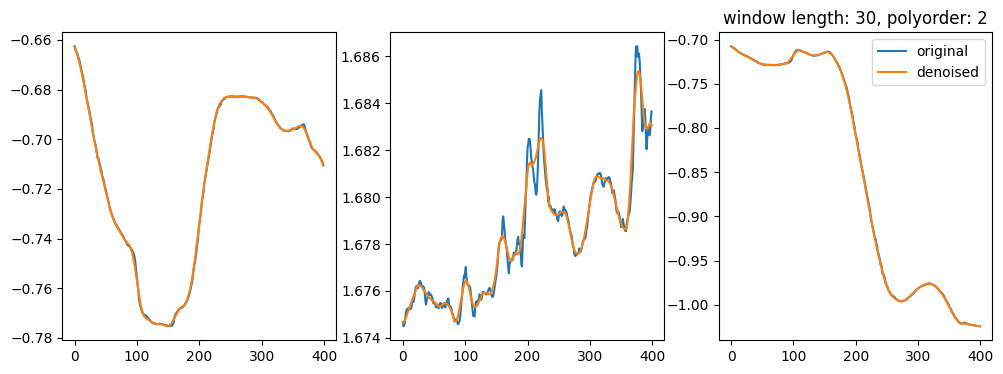

/scratch/jz5952/FoV/dataset/LiaoJunjian_news_interviewing.txt


<Figure size 640x480 with 0 Axes>

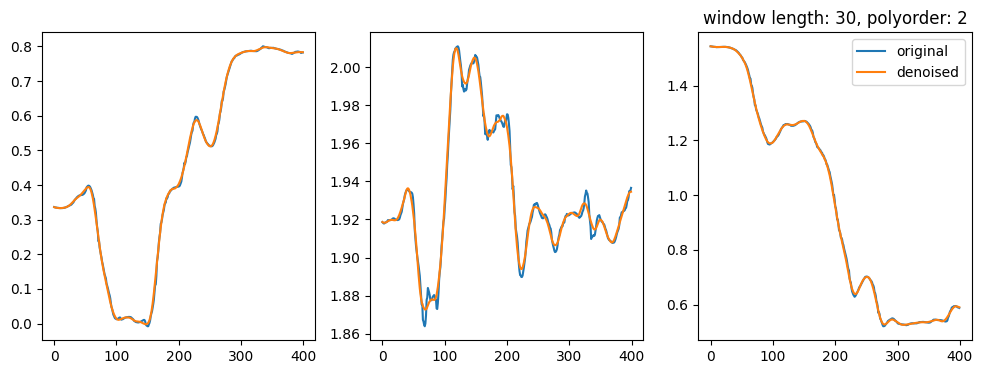

/scratch/jz5952/FoV/dataset/RenHongyu_chatting.txt


<Figure size 640x480 with 0 Axes>

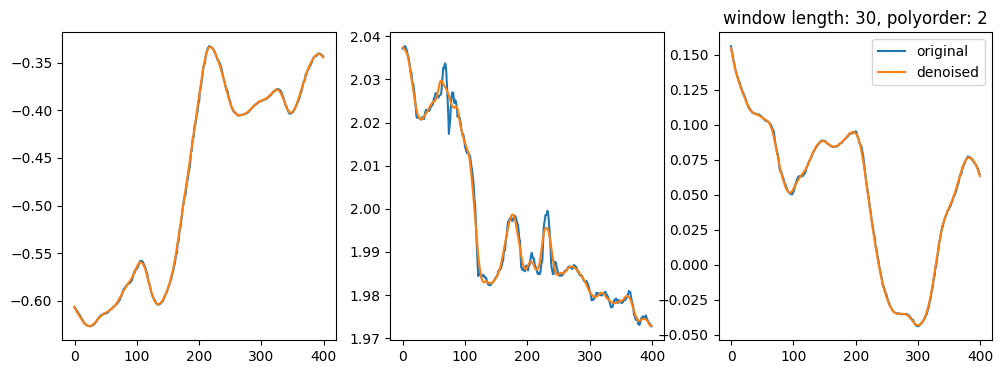

/scratch/jz5952/FoV/dataset/Sunqiran_News_interviewing.txt


<Figure size 640x480 with 0 Axes>

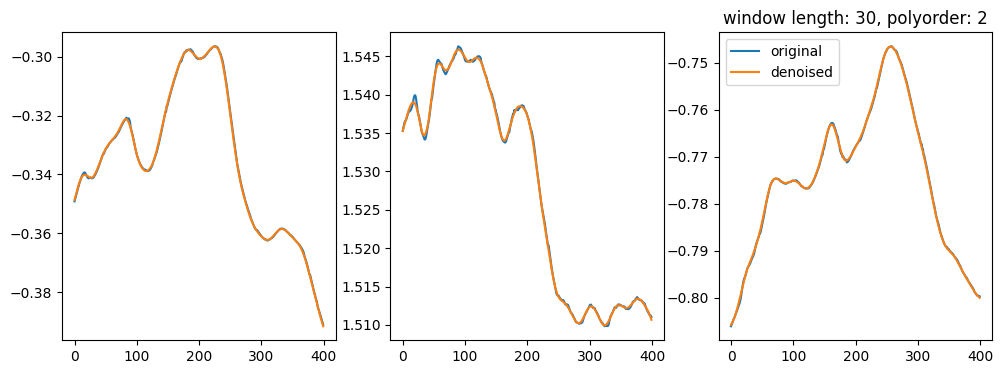

/scratch/jz5952/FoV/dataset/HKY_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

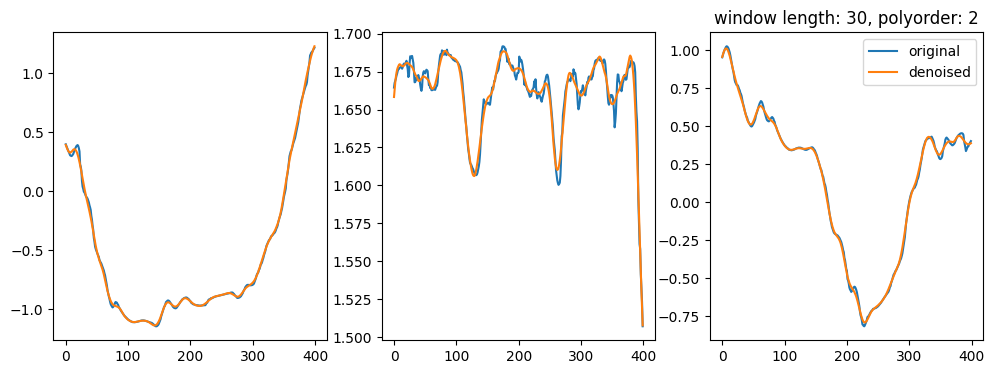

/scratch/jz5952/FoV/dataset/WangYan_cleaning_whiteboard.txt


<Figure size 640x480 with 0 Axes>

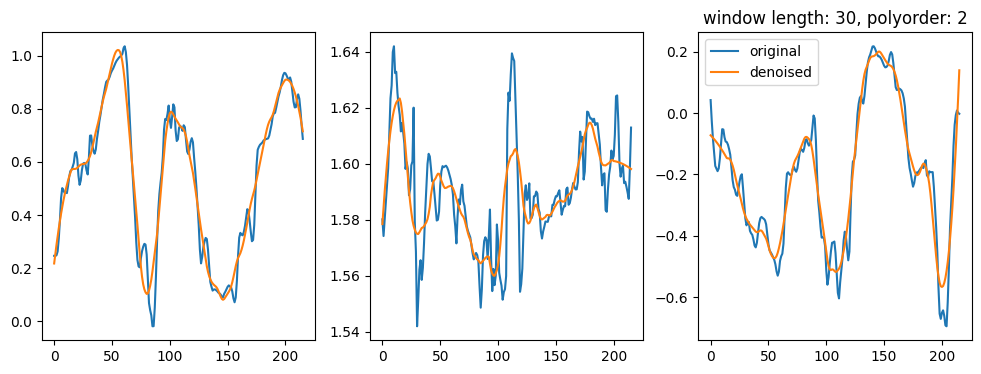

/scratch/jz5952/FoV/dataset/FengXuanqi_chatting.txt


<Figure size 640x480 with 0 Axes>

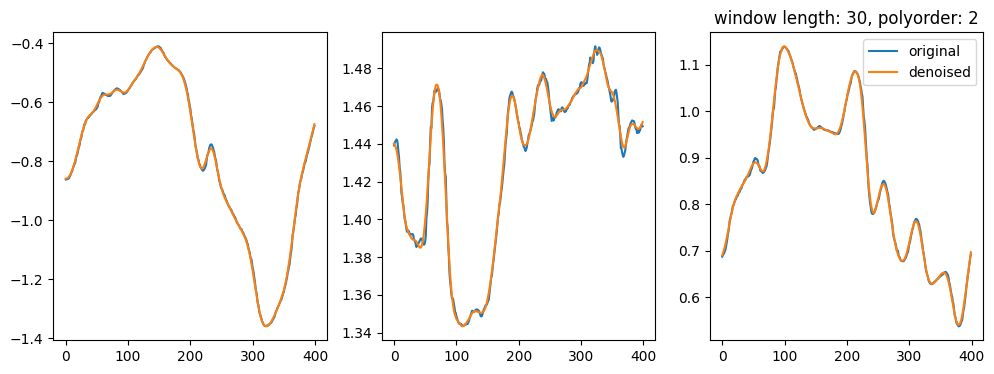

/scratch/jz5952/FoV/dataset/RenZhichen_sweep.txt


<Figure size 640x480 with 0 Axes>

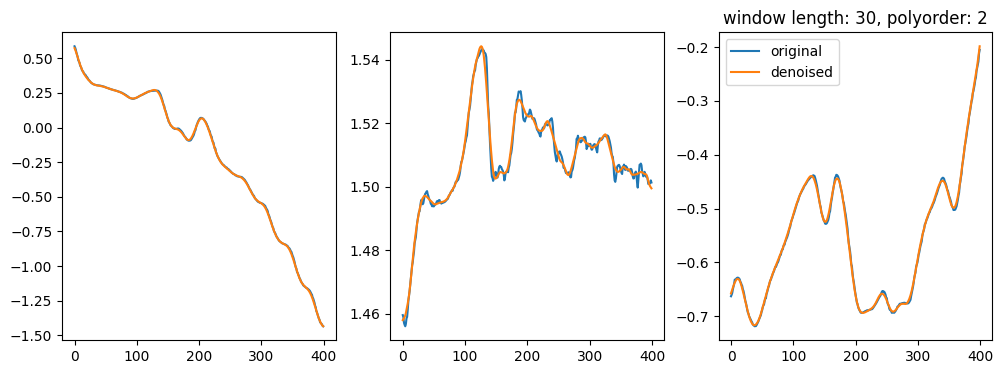

/scratch/jz5952/FoV/dataset/yuchen_News_interviewing.txt


<Figure size 640x480 with 0 Axes>

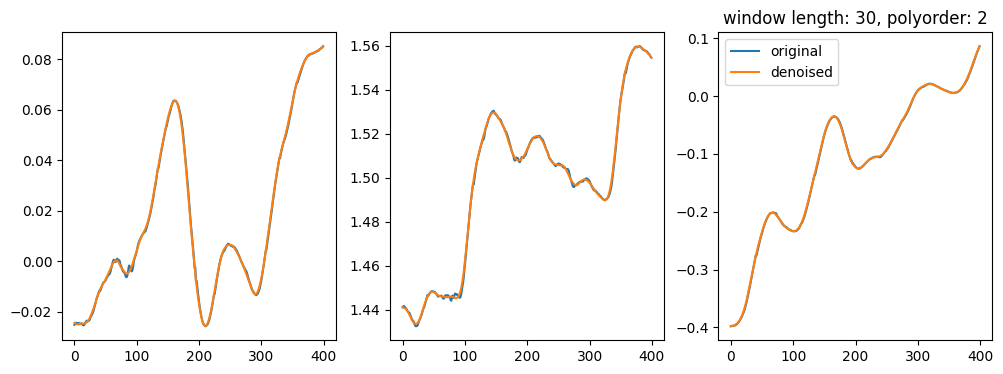

/scratch/jz5952/FoV/dataset/RenZhichen_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

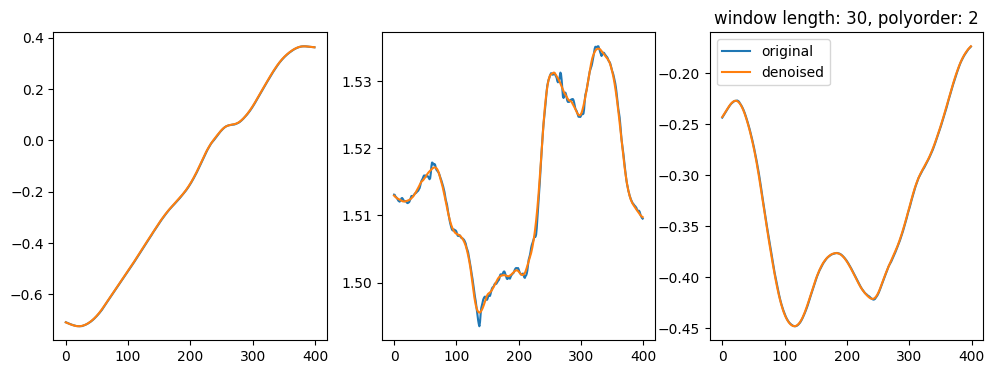

/scratch/jz5952/FoV/dataset/Guozhaonian_presenting.txt


<Figure size 640x480 with 0 Axes>

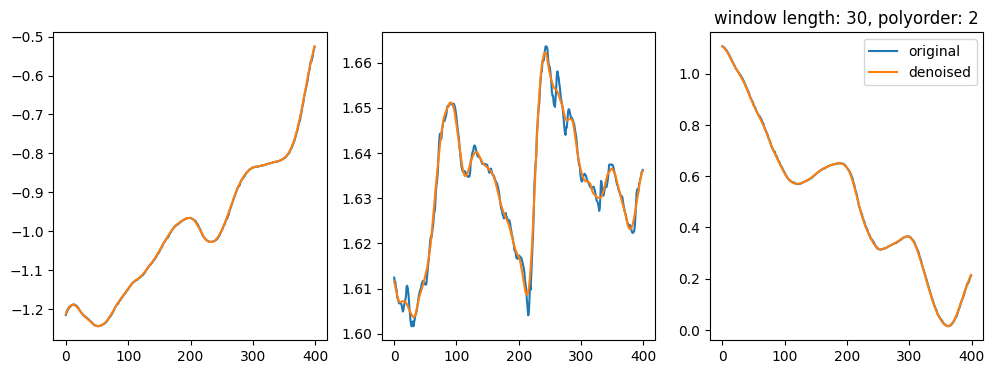

/scratch/jz5952/FoV/dataset/HKY_Pulling_trolley.txt


<Figure size 640x480 with 0 Axes>

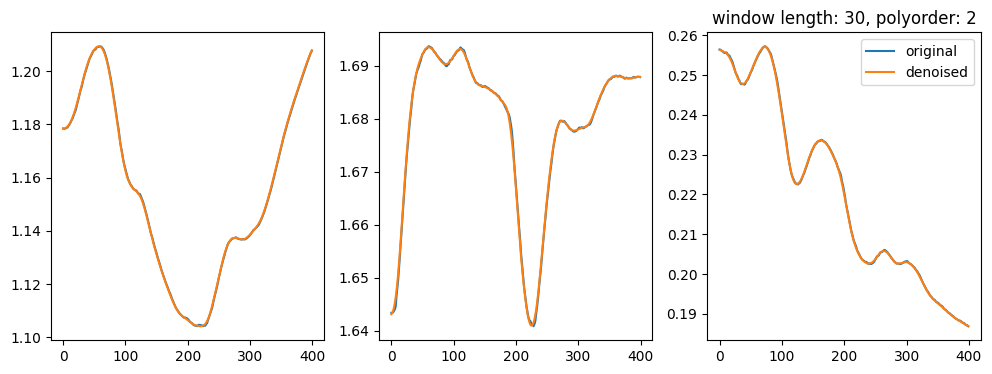

/scratch/jz5952/FoV/dataset/Renhongyu_sweep.txt


<Figure size 640x480 with 0 Axes>

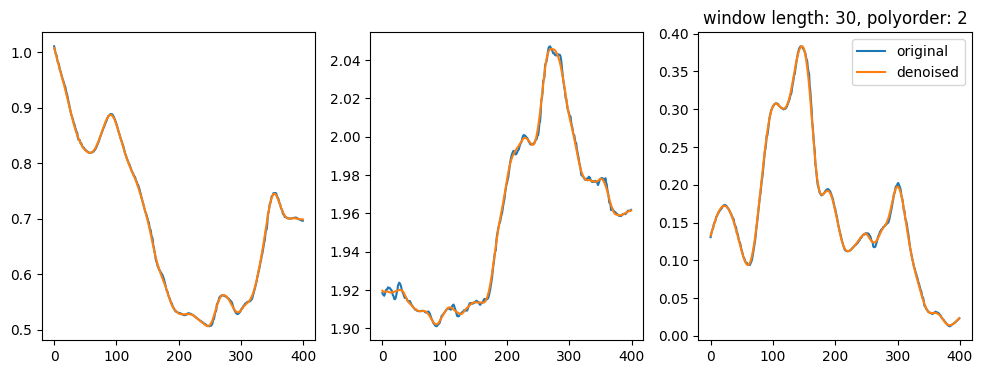

/scratch/jz5952/FoV/dataset/WangYan_News_interviewing.txt


<Figure size 640x480 with 0 Axes>

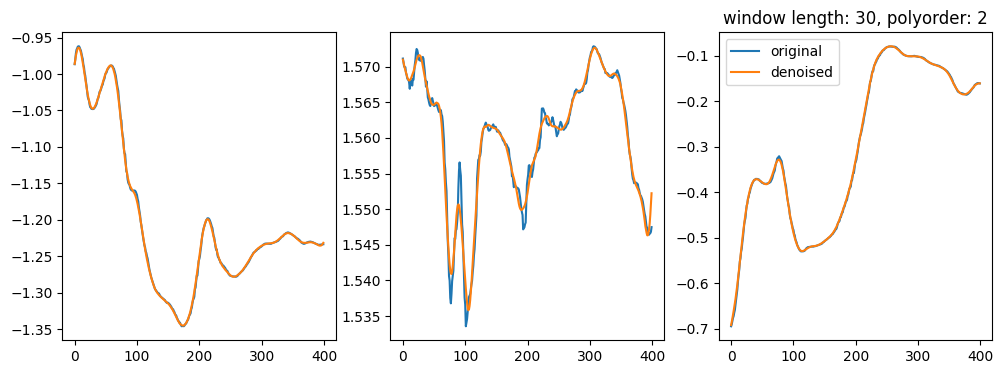

/scratch/jz5952/FoV/dataset/Guozhaonian_sweep.txt


<Figure size 640x480 with 0 Axes>

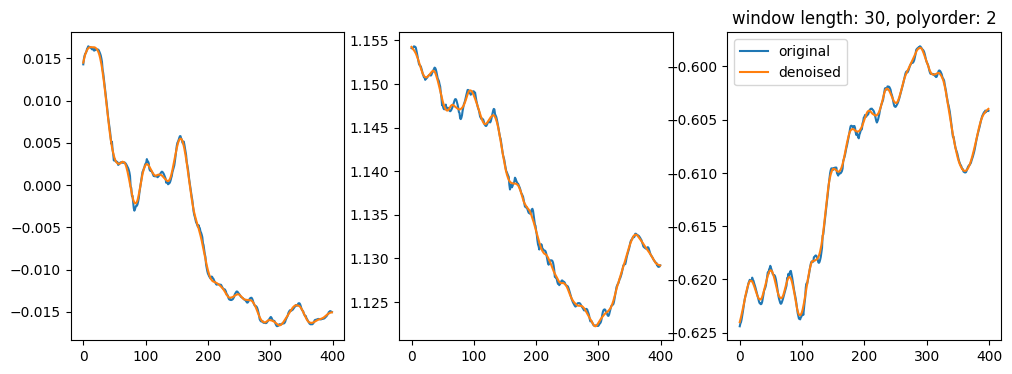

/scratch/jz5952/FoV/dataset/Sunqiran_chatting.txt


<Figure size 640x480 with 0 Axes>

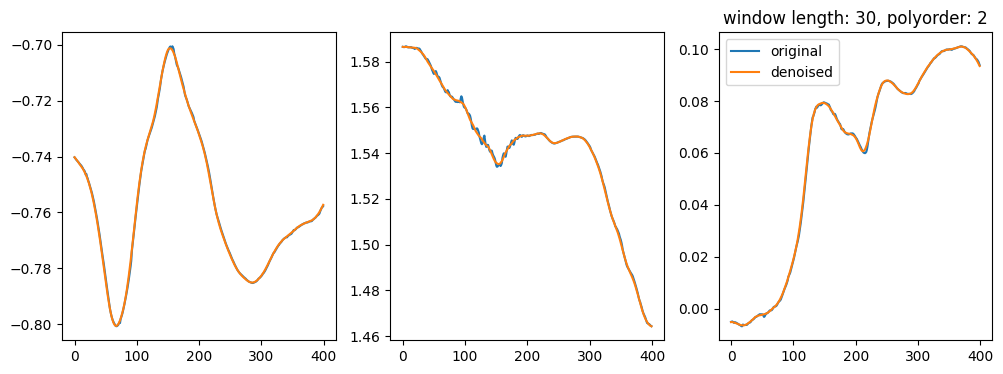

/scratch/jz5952/FoV/dataset/HKY_sweep.txt


<Figure size 640x480 with 0 Axes>

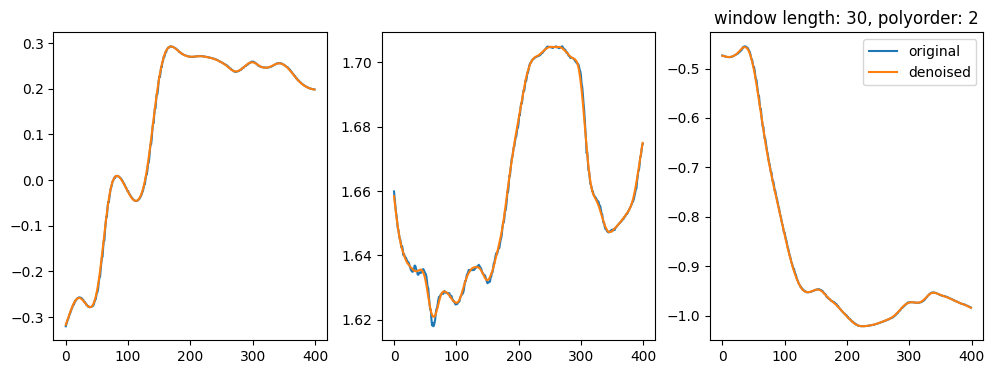

In [8]:
denoise(train_files, save_path="denoised_train.txt", window_length=30, polyorder=2)

In [ ]:
file_len_max = 0
file_max_name = ""
for f in train_files:
    print(f)
    df = pd.read_csv(f,sep=' ',header=None)
    if df.shape[0] > file_len_max:
        file_len_max = df.shape[0]
        file_max_name = f
    print(df.shape)
print(file_max_name, file_len_max)


In [ ]:
def get_sine_cosine(roll, pitch, yaw):

  r_sine = np.sin(roll*np.pi/180)
  r_cosine = np.cos(roll*np.pi/180)
  p_sine = np.sin(pitch*np.pi/180)
  p_cosine = np.cos(pitch*np.pi/180)
  y_sine = np.sin(yaw*np.pi/180)
  y_cosine = np.cos(yaw*np.pi/180)


  return pd.Series({'r_sine': r_sine, 'r_cosine': r_cosine, 'p_sine': p_sine, 'p_cosine': p_cosine, 'y_sine': y_sine, 'y_cosine': y_cosine})

# Creates dataframe for the file and resample
def createDataframe(f):
  df = pd.read_csv(f,sep=' ',header=None)
  df.columns = map(lambda x: x.replace(',',''), df.iloc[0])
  df = df.iloc[1:].astype(float)
  df = df.iloc[:,0:8]
  sine_cosine_df = df.apply(lambda row: get_sine_cosine(row['HeadRX'], row['HeadRY'], row['HeadRZ']), axis=1)
  df = pd.concat([df.iloc[:,0:5], sine_cosine_df], axis=1)
  df.index = pd.to_timedelta(df.index,unit='s')
  df = df.resample('200ms').interpolate('akima') # upsample by 5 --> 5 * 144 Hz
  df = df.resample('2400ms').first() # downsample by 12 --> (5 * 144) / 12 = 60 Hz
  df = df.reset_index(drop = True) # drop the timestamp index added
  regex_pattern = '.*Timer|.*Frame'
  filtered_columns = df.filter(regex=regex_pattern, axis=1)
  df = df.drop(columns=filtered_columns.columns)
  return df

# Creates input and output numpy array for a given dataframe, history_size, target_size and
# step size (in sec)
def multivariate_data(df, history_size = 10, target_size = 10, step = 15, window_size=60):
    data = []
    labels = []
    start_index = history_size * window_size
    end_index = len(df) - target_size * window_size

    for i in range(start_index, end_index, step):
        indices = range(i-history_size * window_size, i)
        data.append(df.iloc[indices])
        labels.append(df.iloc[i:i+target_size * window_size])

    return np.array(data), np.array(labels)

def normalizeData(files, history_size = 10, target_size = 10, window_size=60):
  concatenatedDf = pd.DataFrame()
  for f in files:
    df = createDataframe(f)
    len(df)
    if len(df) < (history_size + target_size) * (window_size):
      continue
    concatenatedDf = pd.concat([concatenatedDf, df], axis=0)
  HeadX_mean = concatenatedDf['HeadX'].mean()
  HeadY_mean = concatenatedDf['HeadY'].mean()
  HeadZ_mean = concatenatedDf['HeadZ'].mean()
  HeadX_std = concatenatedDf['HeadX'].std()
  HeadY_std = concatenatedDf['HeadY'].std()
  HeadZ_std = concatenatedDf['HeadZ'].std()

  return HeadX_mean, HeadY_mean, HeadZ_mean, HeadX_std, HeadY_std, HeadZ_std

# Creates sequences for all the files
def createSequence(files, history_size = 10, target_size = 10, step = 15, window_size=60):
  x_list = []
  y_list = []

  HeadX_mean, HeadY_mean, HeadZ_mean, HeadX_std, HeadY_std, HeadZ_std = normalizeData(files, history_size, target_size, window_size)
  mean_std = np.array([HeadX_mean, HeadY_mean, HeadZ_mean, HeadX_std, HeadY_std, HeadZ_std])
  for f in files:
    print(f)
    df = createDataframe(f)
    len(df)
    if len(df) < (history_size + target_size) * (window_size):
      continue
    df['HeadX'] = (df['HeadX'] - HeadX_mean) / HeadX_std
    df['HeadY'] = (df['HeadY'] - HeadY_mean) / HeadY_std
    df['HeadZ'] = (df['HeadZ'] - HeadZ_mean) / HeadZ_std

    x_data, y_data = multivariate_data(df, history_size, target_size)
    x_list.append(x_data)
    y_list.append(y_data)

  x = np.concatenate(x_list, axis=0)
  y = np.concatenate(y_list, axis=0)
  return x, y, mean_std


def createAndSaveLongSequence(files, save_path, history_size = 10, target_size = 10, window_size=60):
  x_list = []
  y_list = []

  HeadX_mean, HeadY_mean, HeadZ_mean, HeadX_std, HeadY_std, HeadZ_std = normalizeData(files, history_size, target_size, window_size)
  mean_std = np.array([HeadX_mean, HeadY_mean, HeadZ_mean, HeadX_std, HeadY_std, HeadZ_std])
  for f in files:
    print(f)
    file_name = f.split('/')[-1][:-4]
    # print(file_name)
    df = createDataframe(f)
    len(df)
    if len(df) < (history_size + target_size) * (window_size):
      continue
    df['HeadX'] = (df['HeadX'] - HeadX_mean) / HeadX_std
    df['HeadY'] = (df['HeadY'] - HeadY_mean) / HeadY_std
    df['HeadZ'] = (df['HeadZ'] - HeadZ_mean) / HeadZ_std
    df.to_csv(f'{save_path}/{file_name}_{history_size}_{target_size}.csv', index=False)
    # print(df)
  return df, mean_std



In [ ]:
history_size = 2.0
target_size = 0.1
save_path = f'{root_path}/processed_long_sequence'
df_train, mean_std_train = createAndSaveLongSequence(train_files,save_path,history_size,target_size)

In [ ]:
df = pd.read_csv(f'{save_path}/FengXuanqi_chatting_2_1.csv', sep=',', header=0)

In [ ]:
df.iloc[23:23+120,[1,2,3,6,7,8]].values.shape

In [ ]:
history_size = 2.0
target_size = 0.1
x_train,y_train, mean_std_train = createSequence(train_files,history_size,target_size)
x_val,y_val, mean_std_val = createSequence(val_files,history_size,target_size)
x_test,y_test, mean_std_test = createSequence(test_files,history_size,target_size)

In [ ]:
x_train

In [ ]:
x_train.shape

In [ ]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_val[0,:,1])
plt.plot(y_val[0,:,1])
plt.show()

In [ ]:
mean_std = np.concatenate((mean_std_train,mean_std_val,mean_std_test))
mean_std

In [ ]:
# save to csv file
from logging import root


np.savetxt(f'{root_path}/processed_data/x_train_{history_size}_{target_size}.csv', x_train.reshape((x_train.shape[0],-1)), delimiter=',')
np.savetxt(f'{root_path}/processed_data/y_train_{history_size}_{target_size}.csv', y_train.reshape((y_train.shape[0],-1)), delimiter=',')
np.savetxt(f'{root_path}/processed_data/x_val_{history_size}_{target_size}.csv', x_val.reshape((x_val.shape[0],-1)), delimiter=',')
np.savetxt(f'{root_path}/processed_data/y_val_{history_size}_{target_size}.csv', y_val.reshape((y_val.shape[0],-1)), delimiter=',')
np.savetxt(f'{root_path}/processed_data/x_test_{history_size}_{target_size}.csv', x_test.reshape((x_test.shape[0],-1)), delimiter=',')
np.savetxt(f'{root_path}/processed_data/y_test_{history_size}_{target_size}.csv', y_test.reshape((y_test.shape[0],-1)), delimiter=',')
np.savetxt(f'{root_path}/processed_data/xyz_mean_std_{history_size}_{target_size}.csv',mean_std)

In [ ]:
class FoVDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.tensor(self.x_data[idx])
        y = torch.tensor(self.y_data[idx])
        return x,y

In [ ]:
train_data = FoVDataset(x_train, y_train)
val_data = FoVDataset(x_val, y_val)
test_data = FoVDataset(x_test, y_test)

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
train_data[0][0][0]

In [ ]:
x_train.shape[1]